In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms

In [5]:
%load_ext kedro.ipython

[12/20/24 15:25:40] INFO     Resolved project path as:                                              ]8;id=158617;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=288327;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/20/24 15:25:40] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=940112;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=159517;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=224262;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=371373;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=632225;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=386259;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=829455;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=950368;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[12/20/24 15:25:41] INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=469022;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=444718;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=71503;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=367353;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=222122;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=884994;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/20/24 15:25:41] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=425131;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=74540;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=188719;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=220548;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=458238;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=230955;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=554966;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=14639;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [7]:
params1= catalog.list
params= catalog.load("parameters")

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=647544;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=743096;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### models:

In [8]:
info_save_all = catalog.load('info_save_all')

                    INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=660739;file:///opt/conda/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=641614;file:///opt/conda/lib/python3.11/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [9]:
info_save_all.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'all_results', 'best_model_metrics_dataset', 'select_model'])

info_save_all2 = info_save_all.copy()
for col in info_save_all.keys():
    if isinstance(col, int) and ('grid_search' not in info_save_all[col].keys()):
        del info_save_all2[col]

print(info_save_all2.keys())
print(info_save_all.keys())
info_save_last_all = models.evaluate_models_for_all(info_save_all2, params)
info_save_all_correct = models.compare_metrics_models(info_save_last_all, params)
print(info_save_all_correct.keys())

import pickle
import boto3
from io import BytesIO

# Configura el cliente de S3 (asegúrate de tener configuradas las credenciales de AWS)
s3_client = boto3.client('s3')

# Serializa el objeto en memoria (sin necesidad de archivo local)
pickle_buffer = BytesIO()
pickle.dump(info_save_all_correct, pickle_buffer)
pickle_buffer.seek(0)  # Vuelve al principio del buffer después de serializar


# Define el nombre del bucket y la ruta en S3
bucket_name = 'data-bbog-dev-sandbox-entity'
s3_key = 'casos-uso/fabrica-personas/AH/06-models/info_save_all.pickle'

# Sube el archivo pickle a S3
s3_client.upload_fileobj(pickle_buffer, bucket_name, s3_key)

print("Object has been pickled and uploaded to S3.")

In [10]:
for i in range(12):
    display(info_save_all[i]['Muestreo_tipo'])


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}

In [ ]:
# con eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

In [11]:
# sin eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

REINDEX     generacion
llave                                              
0             generacion__centennial  _generacion_x
1           generacion__generacion_x    _millennial
2             generacion__millennial    _centennial
DROP_FIRST                       NaN   _baby_boomer

In [ ]:
# con EDA
info_temp = models.compare_metrics_models(info_save_all,params)

[12/19/24 14:28:48] INFO     Iniciando la comparacion de metricas sobre las datas generadas en         ]8;id=616004;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=229790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#891\891]8;;\
                             Model_input:                                                                          

                    INFO     Graficos de desempeños en ['cohen_kappa', 'roc_auc'] calculadas tipo:     ]8;id=776456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=925983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#895\895]8;;\
                             ['overall metric']                                                                    

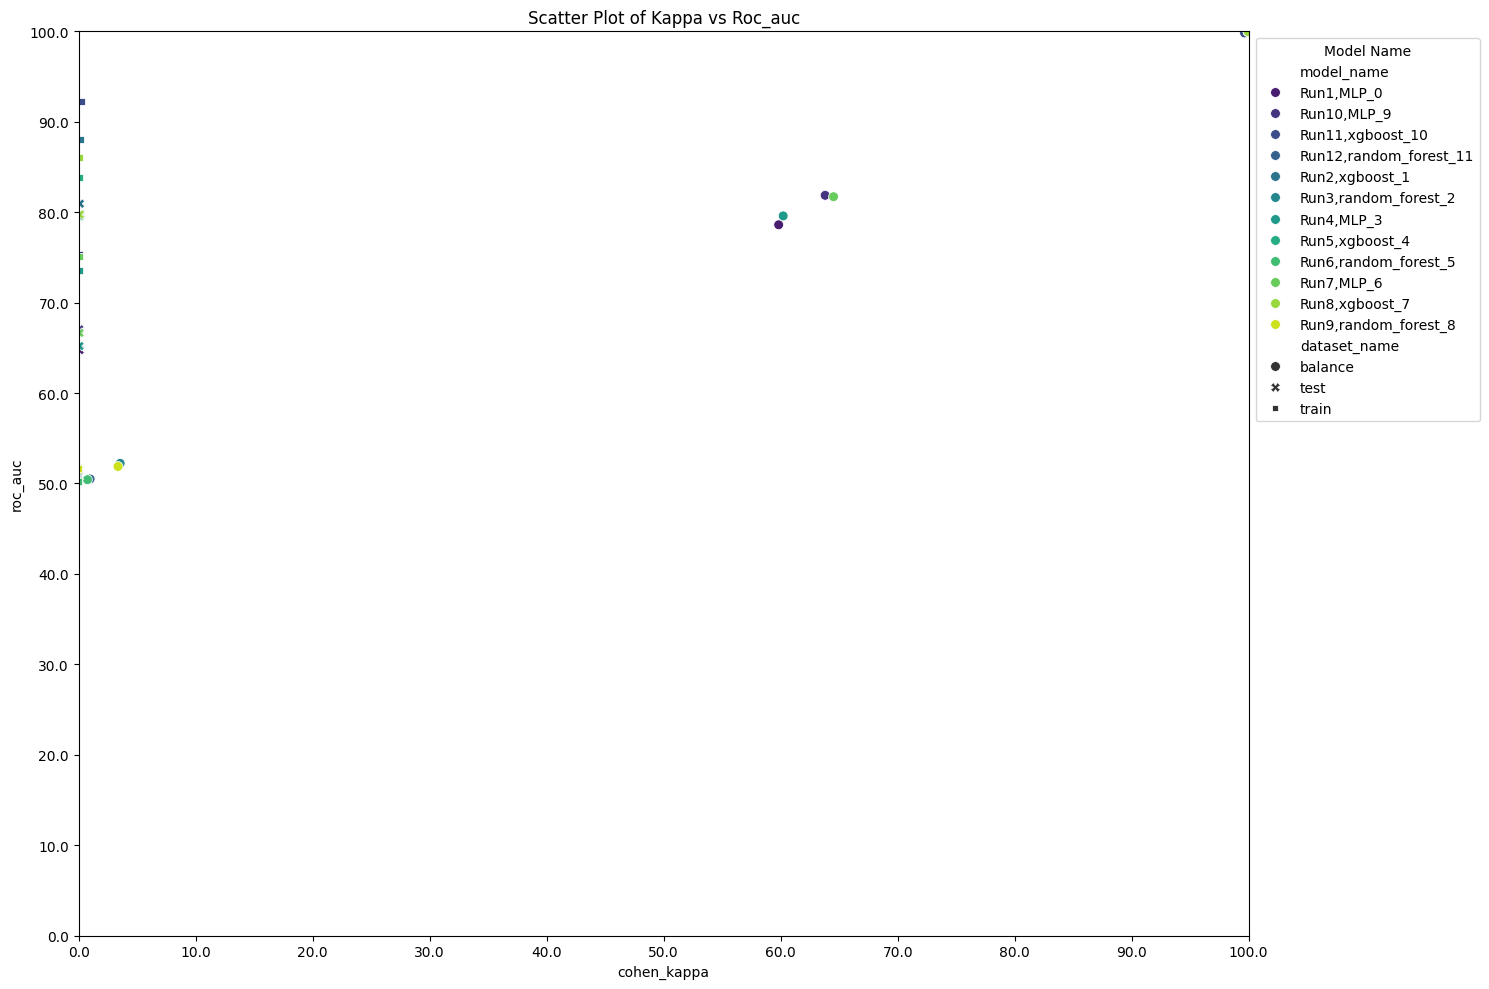

[12/19/24 14:28:49] INFO     Graficos de desempeños en ['1', '1.0', 1, 1.0] calculadas sobre y         ]8;id=331378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=567486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#919\919]8;;\
                             f1-score                                                                              

                    INFO     Algoritmos con Metricas = 0: ['Run1,MLP_0', 'Run2,xgboost_1',             ]8;id=807271;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=834031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#926\926]8;;\
                             'Run3,random_forest_2', 'Run4,MLP_3', 'Run5,xgboost_4',                               
                             'Run6,random_forest_5', 'Run7,MLP_6', 'Run8,xgboost_7',                               
                             'Run9,random_forest_8', 'Run10,MLP_9', 'Run11,xgboost_10',                            
                             'Run12,random_forest_11']                                                             

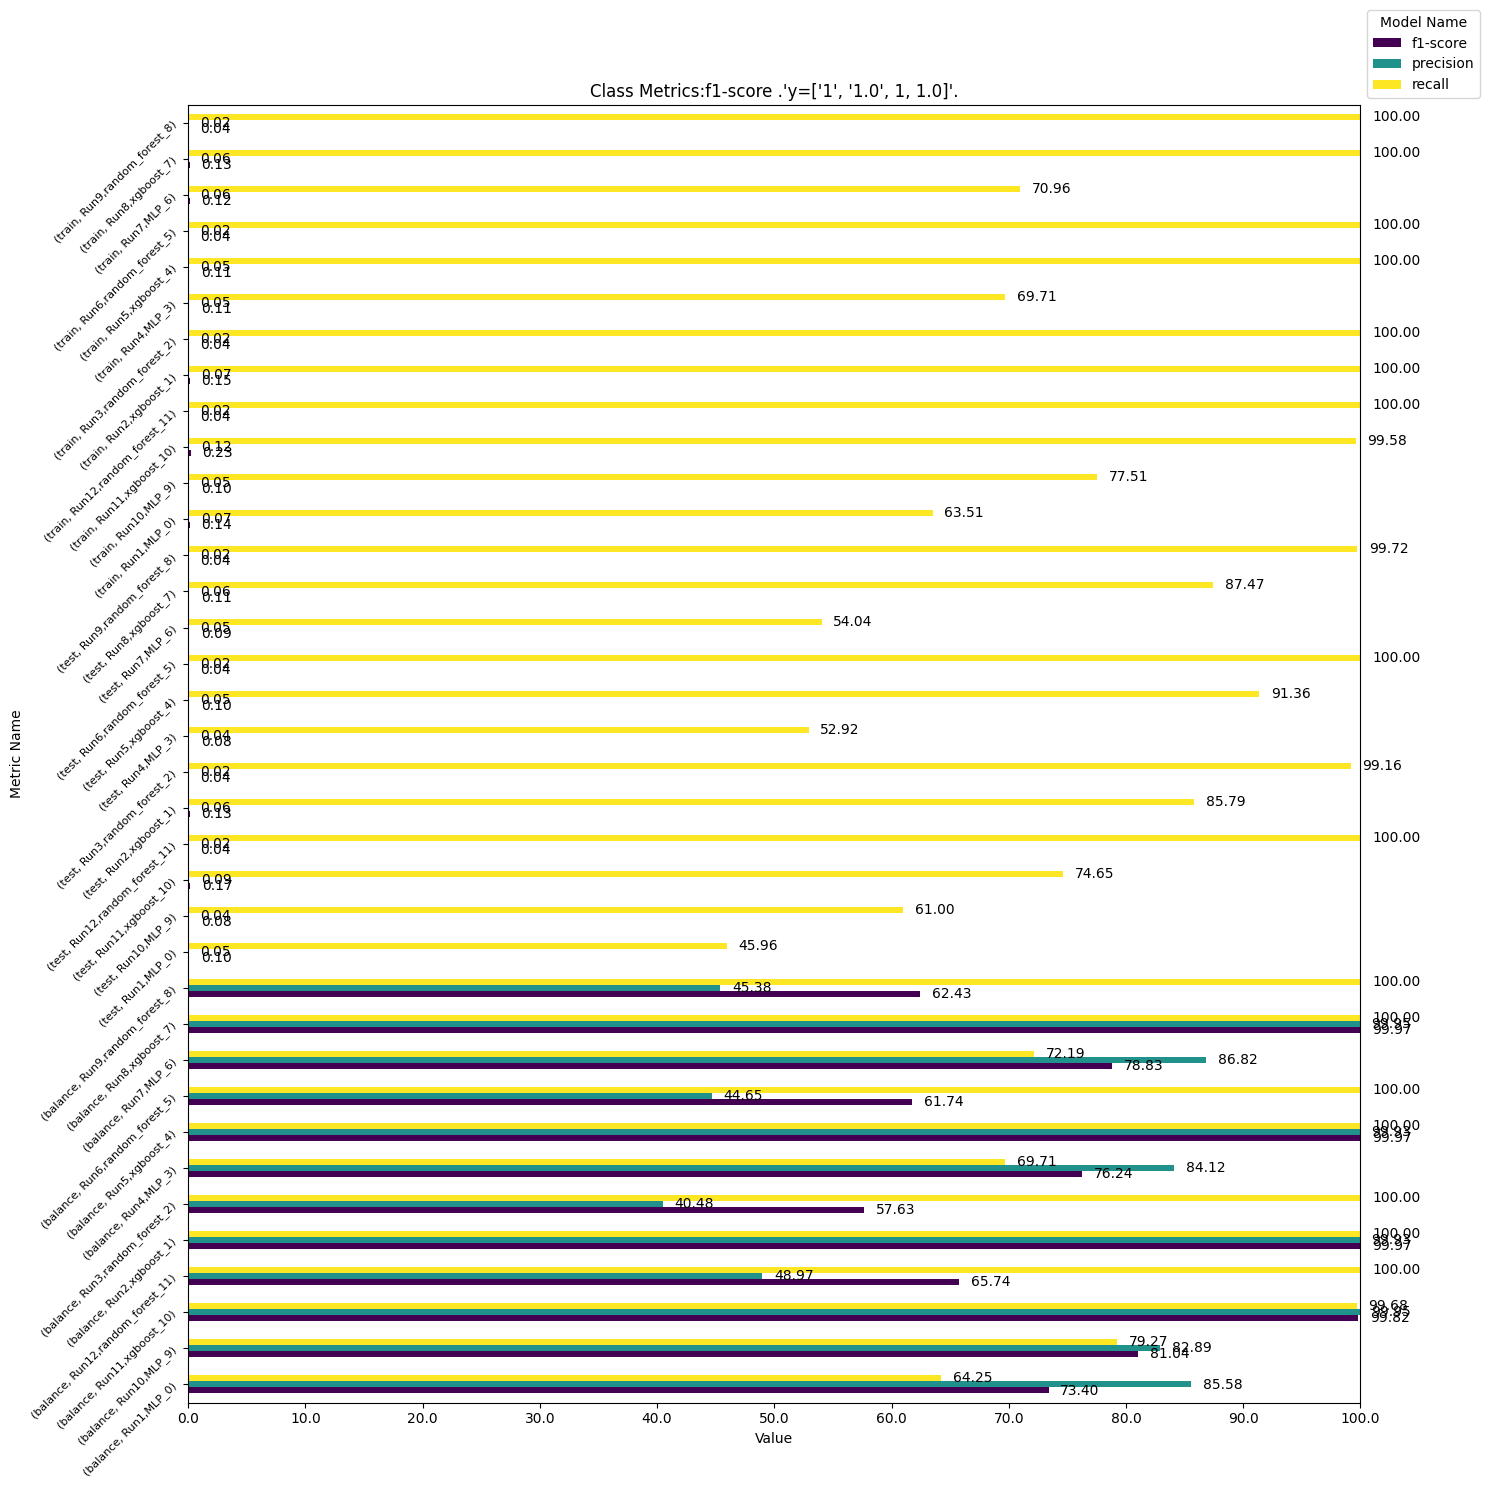

                    INFO     Mejores algoritmos por metrica y dataset:                                 ]8;id=310765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=422597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#960\960]8;;\

model_name dataset_name metric_name   metric_type class_name  \
98      Run11,xgboost_10         test    f1-score  class metric        1.0   
96      Run11,xgboost_10         test   precision  class metric        1.0   
52  Run6,random_forest_5         test      recall  class metric        1.0   
95      Run11,xgboost_10        train    f1-score  class metric        1.0   
93      Run11,xgboost_10        train   precision  class metric        1.0   
13        Run2,xgboost_1        train      recall  class metric        1.0   

       value  
98    0.1731  
96    0.0867  
52  100.0000  
95    0.2302  
93    0.1152  
13  100.0000

[12/19/24 14:28:50] INFO     Mejores algoritmos:                                                      ]8;id=815272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=763422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#1007\1007]8;;\

best_model_name   best_unbiased_model      best_fitting_model
model_name   Run11,xgboost_10  Run3,random_forest_2  Run12,random_forest_11
metric_name          f1-score              f1-score                f1-score
metric_type      class metric          class metric            class metric
class_name                1.0                   1.0                     1.0
test                   0.1731                0.0362                  0.0354
balance               99.8179               57.6297                 65.7403
train                  0.2302                0.0365                  0.0354
bias                 -99.5877              -57.5932                -65.7049
real_bias                True                  True                    True
test-train            -0.0571               -0.0003                     0.0
fitting           overfitting           overfitting            Underfitting

In [12]:
# sin EDA
info_temp = models.compare_metrics_models(info_save_all,params)

In [16]:
pct = 0.60

In [ ]:
# con EDA
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df

In [ ]:
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)

In [ ]:
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)

In [ ]:
df_metrics_test[df_metrics_test['model_name'].isin(names)]

In [ ]:
df_metrics_train[df_metrics_train['model_name'].isin(names)]

In [ ]:
info_save_all['best_model_metrics_dataset']

In [17]:
# sin EDA
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print('N Models: ',np.sum(weightss))
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

['Run1', 'Run2', 'Run4', 'Run5', 'Run7', 'Run8', 'Run11']
[1, 1, 1, 1, 1, 1, 1]
N Models:  7


model_name dataset_name metric_name   metric_type class_name   value
16  Run11,xgboost_10         test    f1-score  class metric        1.0  0.1731
16    Run2,xgboost_1         test    f1-score  class metric        1.0  0.1260
16    Run8,xgboost_7         test    f1-score  class metric        1.0  0.1098
16    Run5,xgboost_4         test    f1-score  class metric        1.0  0.0995
16        Run1,MLP_0         test    f1-score  class metric        1.0  0.0982
16        Run7,MLP_6         test    f1-score  class metric        1.0  0.0916
16        Run4,MLP_3         test    f1-score  class metric        1.0  0.0825

model_name dataset_name metric_name   metric_type class_name   value
16  Run11,xgboost_10        train    f1-score  class metric        1.0  0.2302
16    Run2,xgboost_1        train    f1-score  class metric        1.0  0.1468
16        Run1,MLP_0        train    f1-score  class metric        1.0  0.1357
16    Run8,xgboost_7        train    f1-score  class metric        1.0  0.1256
16        Run7,MLP_6        train    f1-score  class metric        1.0  0.1204
16    Run5,xgboost_4        train    f1-score  class metric        1.0  0.1088
16        Run4,MLP_3        train    f1-score  class metric        1.0  0.1086

model_name dataset_name metric_name   metric_type class_name  \
98      Run11,xgboost_10         test    f1-score  class metric        1.0   
96      Run11,xgboost_10         test   precision  class metric        1.0   
52  Run6,random_forest_5         test      recall  class metric        1.0   
95      Run11,xgboost_10        train    f1-score  class metric        1.0   
93      Run11,xgboost_10        train   precision  class metric        1.0   
13        Run2,xgboost_1        train      recall  class metric        1.0   

       value  
98    0.1731  
96    0.0867  
52  100.0000  
95    0.2302  
93    0.1152  
13  100.0000

## model_selection

In [ ]:
## algoritmo best_model_name unico:

In [ ]:
info_save_select_ini = catalog.load('info_save_select_best') # best model unico

In [ ]:
check_df = info_save_select_ini['select_model2']
check_df = check_df[np.in1d(check_df.index.get_level_values(1),['backtest'])].reset_index() 
check_df = check_df.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df

In [ ]:
info_save_select_mvp2 = catalog.load('info_save_select_mvp2') # best model unico

In [ ]:
check_df_mvp2 = info_save_select_mvp2['select_model2']
check_df_mvp2 = check_df_mvp2[np.in1d(check_df_mvp2.index.get_level_values(1),['backtest'])].reset_index() 
check_df_mvp2 = check_df_mvp2.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_mvp2

In [18]:
params['Ensamble']['want'] = True
params['optimizacion_bayesiana']['want'] = False
params['Ensamble']['Algoritmos'] = ensamble
params['Ensamble']['weights'] = weightss

In [19]:
params['n_obs_filter']

0.3

In [20]:
params['use_key']

{'want': False, 'llave': ['Run10,xgboost_9'], 'estrategia': ['best_model_name']}

In [21]:
params['Ensamble']


{
    'want': True,
    'Algoritmos': ['Run1', 'Run2', 'Run4', 'Run5', 'Run7', 'Run8', 'Run11'],
    'weights': [1, 1, 1, 1, 1, 1, 1],
    'scorer': 'backtest_scorer'
}

In [22]:
info_save_temp=ms.generate_modelo_produccion(info_save_all, params)

[12/19/24 14:40:13] INFO     Iniciando el Ensamblado de modelos...                                     ]8;id=674756;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=113539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#747\747]8;;\

                    INFO     train                                                                     ]8;id=407883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=442561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=848867;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=244891;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:16] INFO     Nodo 1, Run2                                                              ]8;id=101450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=932913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:18] INFO     Nodo 3, Run4                                                              ]8;id=941405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=95192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:21] INFO     Nodo 4, Run5                                                              ]8;id=62174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=690167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:23] INFO     Nodo 6, Run7                                                              ]8;id=403587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=255260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:28] INFO     Nodo 7, Run8                                                              ]8;id=104284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=336083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:30] INFO     Nodo 10, Run11                                                            ]8;id=822819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=758827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:33] INFO     test                                                                      ]8;id=917361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=739116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=828131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=899475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:34] INFO     Nodo 1, Run2                                                              ]8;id=181567;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=770616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

                    INFO     Nodo 3, Run4                                                              ]8;id=517767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=185149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:35] INFO     Nodo 4, Run5                                                              ]8;id=838980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=528687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:36] INFO     Nodo 6, Run7                                                              ]8;id=759970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=426463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:37] INFO     Nodo 7, Run8                                                              ]8;id=883142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=223335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:38] INFO     Nodo 10, Run11                                                            ]8;id=738413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=419282;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[12/19/24 14:40:48] INFO     Ok Forecast                                                               ]8;id=937281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=298417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#723\723]8;;\

                    INFO     Iniciando el calculo de las metricas...                                  ]8;id=330907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=307897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1073\1073]8;;\

                    INFO     Tipo de Threshold: KS                                                    ]8;id=235590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=509972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1079\1079]8;;\

                    INFO     Models: best_model_name                                                  ]8;id=780089;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=42386;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_model_name                                               ]8;id=650048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=251234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 2449287                                                           ]8;id=934166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=157372;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[12/19/24 14:40:51] INFO     TOP N: 612322                                                            ]8;id=501072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=106136;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

value name_model  model_name  \
class_name metric_name    dataset_name                                  
1          f1-score n_top test          0.1032      Run11  xgboost_10   
           true_sum n_top test             316      Run11  xgboost_10   
           backtest       test          0.0516      Run11  xgboost_10   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

                    INFO     Models: best_unbiased_model                                              ]8;id=747631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=984708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_unbiased_model                                           ]8;id=304353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=857508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 2449287                                                           ]8;id=233408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=210961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    3.2s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:   10.0s
[Parallel(n_jobs=64)]: Done 450 out of 450 | elapsed:   13.5s finished


[12/19/24 14:41:08] INFO     TOP N: 612322                                                            ]8;id=121706;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=437162;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.7s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    2.3s
[Parallel(n_jobs=64)]: Done 450 out of 450 | elapsed:    3.2s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          0.0777       Run3  random_forest_2   
           true_sum n_top test             238       Run3  random_forest_2   
           backtest       test          0.0389       Run3  random_forest_2   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[12/19/24 14:41:12] INFO     Models: best_fitting_model                                               ]8;id=286659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=378608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_fitting_model                                            ]8;id=331609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=125373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 2449287                                                           ]8;id=601045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    2.9s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    9.7s
[Parallel(n_jobs=64)]: Done 450 out of 450 | elapsed:   13.1s finished


[12/19/24 14:41:28] INFO     TOP N: 612322                                                            ]8;id=817798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=842043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    0.6s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    2.4s
[Parallel(n_jobs=64)]: Done 450 out of 450 | elapsed:    3.3s finished


value name_model        model_name  \
class_name metric_name    dataset_name                                        
1          f1-score n_top test          0.0663      Run12  random_forest_11   
           true_sum n_top test             203      Run12  random_forest_11   
           backtest       test          0.0332      Run12  random_forest_11   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[12/19/24 14:41:32] INFO     Estrategy: modelo_produccion                                             ]8;id=778822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=255748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 2449287                                                           ]8;id=770008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=211299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[12/19/24 14:41:36] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=516376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=504181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=697990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=853545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=678960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=871510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             84, 83, 82, 80, 79, 78, 77, 72, 71]                                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=298069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=7173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=397214;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=759599;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=983405;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=446646;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=642552;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=488071;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=778634;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=235900;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=970536;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=288088;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=90119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=632064;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:41:40] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=630686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=612547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=675695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=641985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93]                                    ]8;id=528316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=630356;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=780310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=693814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=419362;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=441054;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=750676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=128218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:41:44] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=548142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=448097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=790019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=834313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=697133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=796555;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 75, 74, 73, 71, 70, 68, 63, 58]                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=324326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=385917;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=894840;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=452538;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=687609;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=877851;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=354442;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=15221;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=889593;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=623766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=766686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:41:48] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=167574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=820784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=123569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=900766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92]                                ]8;id=548780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=12659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=899033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=136094;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=186118;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=853504;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=692373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=900026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:41:53] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=982170;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=946259;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=456975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=753408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=750402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=518561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 72, 71]                                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=281578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=12591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=804529;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=488977;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=993420;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=435384;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=311557;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=699206;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=173963;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=465822;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=351676;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=354750;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=596085;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=529583;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=313730;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=46562;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=876390;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=6473;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=284090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=429304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:41:57] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=531084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=933026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=546869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=229485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92]                                ]8;id=526725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=504439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=672692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=334063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=607200;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=786433;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=388353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=139754;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:41:59] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=40920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=97935;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=425789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=852950;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90]                        ]8;id=193571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=822611;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=299705;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=526936;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=629288;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=217751;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=844814;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=965295;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=413258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=745986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=425259;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=478281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=247897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=218277;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=842939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=596289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:42:02] INFO     Update probs: Selected: 0, Target Select: 2449287, Diff %: -1.0           ]8;id=639963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=674017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/19/24 14:42:04] INFO     Update probs: Selected: 85895, Target Select: 2449287, Diff %:            ]8;id=331298;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=345587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649306104184605                                                                   

[12/19/24 14:42:05] INFO     Update probs: Selected: 171904, Target Select: 2449287, Diff %:           ]8;id=59828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=142578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298146766793765                                                                   

[12/19/24 14:42:07] INFO     Update probs: Selected: 257822, Target Select: 2449287, Diff %:           ]8;id=758385;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=479063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947358966099114                                                                   

[12/19/24 14:42:08] INFO     Update probs: Selected: 343729, Target Select: 2449287, Diff %:           ]8;id=187956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=798774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596616076433672                                                                   

[12/19/24 14:42:09] INFO     Update probs: Selected: 429793, Target Select: 2449287, Diff %:           ]8;id=397064;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=451415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245232183896783                                                                   

[12/19/24 14:42:11] INFO     Update probs: Selected: 515632, Target Select: 2449287, Diff %:           ]8;id=13767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=20908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894766926048274                                                                   

[12/19/24 14:42:12] INFO     Update probs: Selected: 601609, Target Select: 2449287, Diff %:           ]8;id=923207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=646542;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543738238924226                                                                   

[12/19/24 14:42:14] INFO     Update probs: Selected: 687503, Target Select: 2449287, Diff %:           ]8;id=933481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=582763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193048425929669                                                                   

[12/19/24 14:42:15] INFO     Update probs: Selected: 859428, Target Select: 2449287, Diff %:           ]8;id=986458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=161670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491109453485852                                                                   

[12/19/24 14:42:16] INFO     Update probs: Selected: 945239, Target Select: 2449287, Diff %:           ]8;id=943937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=768544;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140758514620785                                                                   

[12/19/24 14:42:18] INFO     Update probs: Selected: 1031084, Target Select: 2449287, Diff %:          ]8;id=994076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=939947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5790268759847254                                                                   

[12/19/24 14:42:19] INFO     Update probs: Selected: 1117343, Target Select: 2449287, Diff %:          ]8;id=163415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=350935;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.54380887172471                                                                     

[12/19/24 14:42:21] INFO     Update probs: Selected: 1289183, Target Select: 2449287, Diff %:          ]8;id=974539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=636642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.473649678457445                                                                    

[12/19/24 14:42:22] INFO     Update probs: Selected: 1461102, Target Select: 2449287, Diff %:          ]8;id=363659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=25790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4034582309055656                                                                   

[12/19/24 14:42:23] INFO     Update probs: Selected: 1718578, Target Select: 2449287, Diff %:          ]8;id=461362;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=168592;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29833539311644575                                                                  

[12/19/24 14:42:25] INFO     Update probs: Selected: 1804459, Target Select: 2449287, Diff %:          ]8;id=373791;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=156999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2632717194840784                                                                   

[12/19/24 14:42:26] INFO     Update probs: Selected: 1976667, Target Select: 2449287, Diff %:          ]8;id=22168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=439349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19296227841000257                                                                  

[12/19/24 14:42:28] INFO     Update probs: Selected: 2234800, Target Select: 2449287, Diff %:          ]8;id=175424;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=47881;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08757119929187555                                                                  

[12/19/24 14:42:29] INFO     Update probs: Selected: 2320375, Target Select: 2449287, Diff %:          ]8;id=12489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=389862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05263245997712804                                                                  

[12/19/24 14:42:30] INFO     Update probs: Selected: 2449287, Target Select: 2449287, Diff %: 0.0      ]8;id=60084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=432211;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=257258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=573772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[12/19/24 14:42:31] INFO     ------------------------------------------------------                    ]8;id=320973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=709557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=158171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=182960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:42:34] INFO     Update probs: Selected: 0, Target Select: 2449287, Diff %: -1.0           ]8;id=899232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=11065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/19/24 14:42:35] INFO     Update probs: Selected: 85989, Target Select: 2449287, Diff %:            ]8;id=25946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=720389;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648922319025904                                                                   

[12/19/24 14:42:36] INFO     Update probs: Selected: 171859, Target Select: 2449287, Diff %:           ]8;id=940975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=313361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298330493731441                                                                   

[12/19/24 14:42:38] INFO     Update probs: Selected: 257730, Target Select: 2449287, Diff %:           ]8;id=639668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=836214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.894773458561614                                                                    

[12/19/24 14:42:39] INFO     Update probs: Selected: 343725, Target Select: 2449287, Diff %:           ]8;id=369525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=30174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596632407717021                                                                   

[12/19/24 14:42:40] INFO     ------------------------------------------------------                    ]8;id=687599;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=811865;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_3,Run4. Weight: 1                                             ]8;id=995095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=799045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:42:43] INFO     Update probs: Selected: 0, Target Select: 2449287, Diff %: -1.0           ]8;id=147797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=131910;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/19/24 14:42:45] INFO     Update probs: Selected: 86116, Target Select: 2449287, Diff %:            ]8;id=447404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=538013;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648403800779574                                                                   

[12/19/24 14:42:46] INFO     Update probs: Selected: 171829, Target Select: 2449287, Diff %:           ]8;id=604891;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=841335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298452978356558                                                                   

[12/19/24 14:42:47] INFO     Update probs: Selected: 257818, Target Select: 2449287, Diff %:           ]8;id=624628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947375297382463                                                                   

[12/19/24 14:42:49] INFO     Update probs: Selected: 343840, Target Select: 2449287, Diff %:           ]8;id=789747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=252516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596162883320738                                                                   

[12/19/24 14:42:50] INFO     Update probs: Selected: 429668, Target Select: 2449287, Diff %:           ]8;id=36596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=893412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245742536501439                                                                   

[12/19/24 14:42:52] INFO     Update probs: Selected: 515619, Target Select: 2449287, Diff %:           ]8;id=785358;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=282014;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894820002719158                                                                   

[12/19/24 14:42:53] INFO     Update probs: Selected: 601685, Target Select: 2449287, Diff %:           ]8;id=812503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=973205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543427944540595                                                                   

[12/19/24 14:42:54] INFO     Update probs: Selected: 687567, Target Select: 2449287, Diff %:           ]8;id=883214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=95568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192787125396085                                                                   

[12/19/24 14:42:56] INFO     Update probs: Selected: 773359, Target Select: 2449287, Diff %:           ]8;id=184255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=248659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842513760126927                                                                   

[12/19/24 14:42:57] INFO     Update probs: Selected: 859223, Target Select: 2449287, Diff %:           ]8;id=802092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=468655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491946431757487                                                                   

[12/19/24 14:42:59] INFO     Update probs: Selected: 1031415, Target Select: 2449287, Diff %:          ]8;id=211561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=300484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5788917346150124                                                                   

[12/19/24 14:43:00] INFO     Update probs: Selected: 1117308, Target Select: 2449287, Diff %:          ]8;id=155166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=500478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438231615976404                                                                   

[12/19/24 14:43:01] INFO     Update probs: Selected: 1203285, Target Select: 2449287, Diff %:          ]8;id=209435;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=979700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087202928852356                                                                   

[12/19/24 14:43:03] INFO     Update probs: Selected: 1288967, Target Select: 2449287, Diff %:          ]8;id=80497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=834376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4737378673875295                                                                   

[12/19/24 14:43:04] INFO     Update probs: Selected: 1461177, Target Select: 2449287, Diff %:          ]8;id=392593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=508651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4034276097492862                                                                   

[12/19/24 14:43:06] INFO     Update probs: Selected: 1547032, Target Select: 2449287, Diff %:          ]8;id=783630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=951629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36837455145109577                                                                  

[12/19/24 14:43:07] INFO     Update probs: Selected: 1633122, Target Select: 2449287, Diff %:          ]8;id=609999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=73107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33322554686322997                                                                  

[12/19/24 14:43:08] INFO     Update probs: Selected: 1804376, Target Select: 2449287, Diff %:          ]8;id=230858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=367002;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2633056068970276                                                                   

[12/19/24 14:43:10] INFO     Update probs: Selected: 1890542, Target Select: 2449287, Diff %:          ]8;id=489000;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=977855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22812557287079874                                                                  

[12/19/24 14:43:11] INFO     Update probs: Selected: 2062879, Target Select: 2449287, Diff %:          ]8;id=28146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=42173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15776346340792238                                                                  

[12/19/24 14:43:13] INFO     Update probs: Selected: 2148321, Target Select: 2449287, Diff %:          ]8;id=951227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=504725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12287902561031026                                                                  

[12/19/24 14:43:14] INFO     Update probs: Selected: 2320547, Target Select: 2449287, Diff %:          ]8;id=376901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=445348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052562235458727374                                                                 

[12/19/24 14:43:15] INFO     Update probs: Selected: 2449287, Target Select: 2449287, Diff %: 0.0      ]8;id=679696;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=183467;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=679360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=31845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[12/19/24 14:43:16] INFO     ------------------------------------------------------                    ]8;id=248347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=781485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 1                                         ]8;id=419360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=348697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:43:19] INFO     Update probs: Selected: 0, Target Select: 2449287, Diff %: -1.0           ]8;id=695649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=46592;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/19/24 14:43:20] INFO     Update probs: Selected: 86331, Target Select: 2449287, Diff %:            ]8;id=238322;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=244844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9647525994299565                                                                   

[12/19/24 14:43:21] INFO     Update probs: Selected: 171762, Target Select: 2449287, Diff %:           ]8;id=494287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=792401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298726527352654                                                                   

[12/19/24 14:43:23] INFO     Update probs: Selected: 258072, Target Select: 2449287, Diff %:           ]8;id=200462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=292514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946338260889802                                                                   

[12/19/24 14:43:24] INFO     Update probs: Selected: 343910, Target Select: 2449287, Diff %:           ]8;id=483638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=139523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.859587708586213                                                                    

[12/19/24 14:43:25] INFO     Update probs: Selected: 429789, Target Select: 2449287, Diff %:           ]8;id=650566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=64345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245248515180132                                                                   

[12/19/24 14:43:26] INFO     ------------------------------------------------------                    ]8;id=248079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=725346;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_6,Run7. Weight: 1                                             ]8;id=45595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=241235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:43:31] INFO     Update probs: Selected: 0, Target Select: 2449287, Diff %: -1.0           ]8;id=871330;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=501133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/19/24 14:43:33] INFO     Update probs: Selected: 86139, Target Select: 2449287, Diff %:            ]8;id=57024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=594447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648309895900317                                                                   

[12/19/24 14:43:34] INFO     Update probs: Selected: 172005, Target Select: 2449287, Diff %:           ]8;id=628611;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=777505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297734401889203                                                                   

[12/19/24 14:43:35] INFO     Update probs: Selected: 257846, Target Select: 2449287, Diff %:           ]8;id=968825;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=128899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.894726097839902                                                                    

[12/19/24 14:43:37] INFO     Update probs: Selected: 429658, Target Select: 2449287, Diff %:           ]8;id=883166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=258213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245783364709811                                                                   

[12/19/24 14:43:38] INFO     Update probs: Selected: 601678, Target Select: 2449287, Diff %:           ]8;id=549762;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=131795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543456524286456                                                                   

[12/19/24 14:43:40] INFO     Update probs: Selected: 773448, Target Select: 2449287, Diff %:           ]8;id=762246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=340414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842150389072411                                                                   

[12/19/24 14:43:41] INFO     Update probs: Selected: 859428, Target Select: 2449287, Diff %:           ]8;id=658851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=594819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491109453485852                                                                   

[12/19/24 14:43:42] INFO     Update probs: Selected: 1031114, Target Select: 2449287, Diff %:          ]8;id=155537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=247573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5790146275222136                                                                   

[12/19/24 14:43:44] INFO     Update probs: Selected: 1117355, Target Select: 2449287, Diff %:          ]8;id=242208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=299968;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438039723397053                                                                   

[12/19/24 14:43:45] INFO     Update probs: Selected: 1203176, Target Select: 2449287, Diff %:          ]8;id=233056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=76523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087647956323615                                                                   

[12/19/24 14:43:47] INFO     Update probs: Selected: 1375256, Target Select: 2449287, Diff %:          ]8;id=203038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=924026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4385076146650025                                                                   

[12/19/24 14:43:48] INFO     Update probs: Selected: 1547144, Target Select: 2449287, Diff %:          ]8;id=622481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=88052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3683288238577186                                                                   

[12/19/24 14:43:49] INFO     Update probs: Selected: 1633053, Target Select: 2449287, Diff %:          ]8;id=523484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.333253718327007                                                                    

[12/19/24 14:43:51] INFO     Update probs: Selected: 1719067, Target Select: 2449287, Diff %:          ]8;id=580922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=850021;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2981357431775043                                                                   

[12/19/24 14:43:52] INFO     Update probs: Selected: 1804751, Target Select: 2449287, Diff %:          ]8;id=775196;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=254861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631525011156308                                                                   

[12/19/24 14:43:54] INFO     Update probs: Selected: 1890450, Target Select: 2449287, Diff %:          ]8;id=662513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22816313482250142                                                                  

[12/19/24 14:43:55] INFO     Update probs: Selected: 1976390, Target Select: 2449287, Diff %:          ]8;id=802119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=611716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19307537254719434                                                                  

[12/19/24 14:43:56] INFO     Update probs: Selected: 2234099, Target Select: 2449287, Diff %:          ]8;id=443396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=241981;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08785740503256662                                                                  

[12/19/24 14:43:58] INFO     Update probs: Selected: 2405966, Target Select: 2449287, Diff %:          ]8;id=810676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=717802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017687188149040925                                                                 

[12/19/24 14:43:59] INFO     Update probs: Selected: 2449287, Target Select: 2449287, Diff %: 0.0      ]8;id=771955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=519437;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=666313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=904496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[12/19/24 14:44:00] INFO     ------------------------------------------------------                    ]8;id=483502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=93354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=744262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=18919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:44:03] INFO     Update probs: Selected: 0, Target Select: 2449287, Diff %: -1.0           ]8;id=8853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=247206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/19/24 14:44:04] INFO     Update probs: Selected: 85633, Target Select: 2449287, Diff %:            ]8;id=534008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=265835;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9650375803243965                                                                   

[12/19/24 14:44:05] INFO     Update probs: Selected: 172128, Target Select: 2449287, Diff %:           ]8;id=136365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=419905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297232214926221                                                                   

[12/19/24 14:44:07] INFO     Update probs: Selected: 257803, Target Select: 2449287, Diff %:           ]8;id=917374;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=910767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947436539695022                                                                   

[12/19/24 14:44:08] INFO     Update probs: Selected: 343624, Target Select: 2449287, Diff %:           ]8;id=899167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=597335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8597044772621584                                                                   

[12/19/24 14:44:09] INFO     Update probs: Selected: 429655, Target Select: 2449287, Diff %:           ]8;id=196765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=842933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245795613172323                                                                   

[12/19/24 14:44:11] INFO     ------------------------------------------------------                    ]8;id=333052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=853369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_10,Run11. Weight: 1                                       ]8;id=618740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=450971;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:44:12] INFO     Update probs: Selected: 0, Target Select: 2449287, Diff %: -1.0           ]8;id=47281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=23180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/19/24 14:44:13] INFO     Update probs: Selected: 85983, Target Select: 2449287, Diff %:            ]8;id=123934;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=705659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648946815950927                                                                   

[12/19/24 14:44:15] INFO     Update probs: Selected: 171796, Target Select: 2449287, Diff %:           ]8;id=77674;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=923149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298587711444187                                                                   

[12/19/24 14:44:16] INFO     Update probs: Selected: 257903, Target Select: 2449287, Diff %:           ]8;id=821303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=117024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947028257611297                                                                   

[12/19/24 14:44:17] INFO     Update probs: Selected: 343833, Target Select: 2449287, Diff %:           ]8;id=815207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=448423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596191463066598                                                                   

[12/19/24 14:44:19] INFO     Update probs: Selected: 429611, Target Select: 2449287, Diff %:           ]8;id=979648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=672957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245975257289162                                                                   

[12/19/24 14:44:20] INFO     Update probs: Selected: 515642, Target Select: 2449287, Diff %:           ]8;id=290482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=853700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894726097839903                                                                   

[12/19/24 14:44:21] INFO     Update probs: Selected: 687638, Target Select: 2449287, Diff %:           ]8;id=201492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=540851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.719249724511664                                                                    

[12/19/24 14:44:23] INFO     Iniciando sistema de votaciones..                                         ]8;id=552579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=545348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[12/19/24 14:44:25] INFO     Ok Sistema de votaciones                                                  ]8;id=927305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=229720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

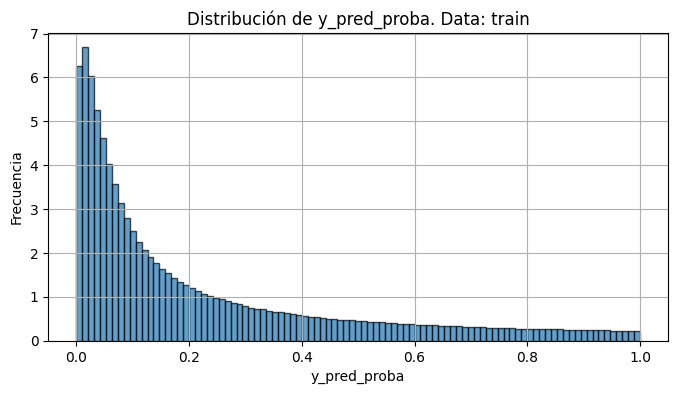

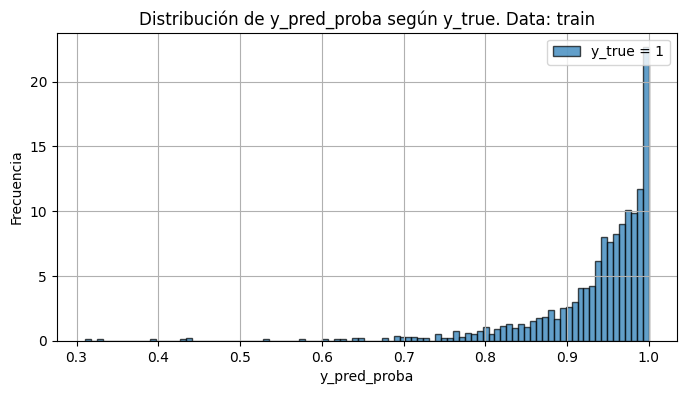

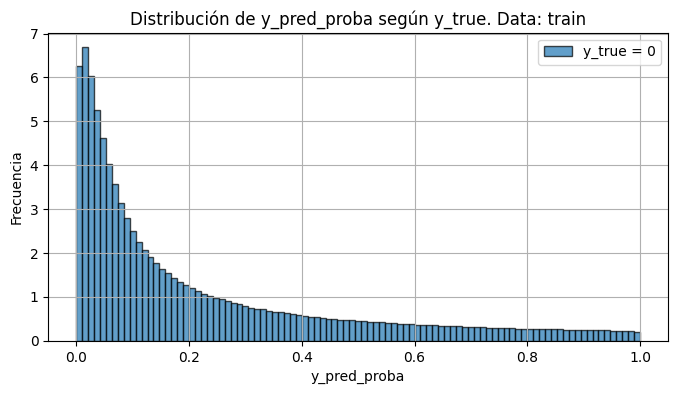

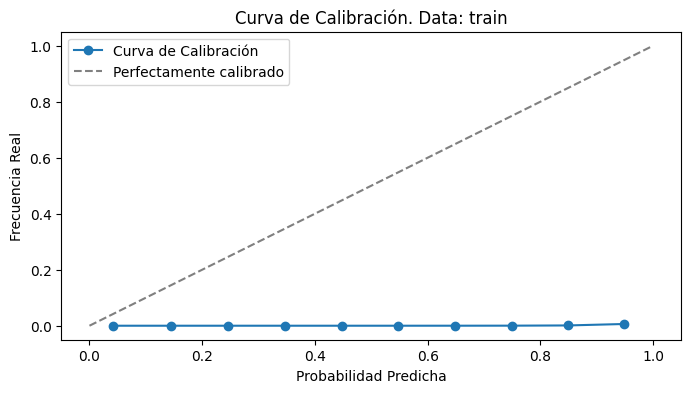

[12/19/24 14:44:33] INFO     TOP N: 612322                                                            ]8;id=200903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=620995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[12/19/24 14:44:34] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=831733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=315262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=540999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=196097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=972243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=310696;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             84, 83, 82, 81, 80, 79, 78, 76, 75, 74, 73, 72, 71, 68, 67, 63, 62, 58,               
                             57, 56, 55, 50, 48, 46, 45, 29]                                                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=745705;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=407175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=828861;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=951332;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=383105;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=921005;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=592229;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=200387;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=243752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=919675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:44:35] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=53664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=561498;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=395621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=252446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 84,    ]8;id=731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=608813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             83, 82, 79, 73, 67, 64]                                                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=332946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=984365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=955409;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=417496;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=325368;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=349122;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=102638;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=681882;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=923833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=442367;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:44:36] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=401844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=902523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=898042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=530348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=487889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=989246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             84, 83, 82, 81, 80, 79, 78, 74, 73, 72, 71, 67, 66, 65, 64, 63, 60, 59,               
                             58, 55, 52, 50, 45, 42, 36, 34, 26]                                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=144874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=715976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=733297;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=395093;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=991227;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=65497;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=670856;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=573315;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=431697;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=427256;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=942582;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=232311;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=319995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=445719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:44:37] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=148695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=714854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=156760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=127675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=893717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=487988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             84, 83, 81, 78, 77, 75, 72, 71]                                                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=291231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=386609;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=684251;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=93885;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=174698;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=579197;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=801681;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=129762;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=219217;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=40504;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=112205;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=825620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=520024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:44:38] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=409765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=201178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=719283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=241383;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=470996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=490937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             84, 83, 82, 80, 79, 78, 76, 75, 74, 73, 72, 71, 67, 62, 61, 58, 54, 49,               
                             46, 45, 41]                                                                           

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=306100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=190382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=730397;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=705028;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=78758;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=496139;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=245884;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=886444;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=404197;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=383718;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=867611;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=931232;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=681450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=516722;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:44:39] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=223401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=685050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=363791;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=2720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 87, 86, 85, 84,    ]8;id=24046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=231841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             81, 80, 77, 74, 70]                                                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=759716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=185459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=239174;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=964247;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=346864;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=637684;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=947196;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=100219;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=385861;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=305276;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=268309;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=977979;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=574430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[12/19/24 14:44:40] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=465676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=917538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#700\700]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=843097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=868422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#738\738]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=633744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=221078;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#762\762]8;;\
                             84, 83, 81, 76, 72, 70, 67, 57, 53, 41]                                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=757046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=453564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=240223;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=279473;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=790227;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=278335;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=462603;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=513705;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=402055;file:///opt/conda/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=458817;file:///opt/conda/lib/python3.11/warnings.py#110\110]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=742855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=788719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=995569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=616679;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=126856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=666683;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=819380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=327056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:44:41] INFO     Update probs: Selected: 0, Target Select: 612322, Diff %: -1.0            ]8;id=454199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 21454, Target Select: 612322, Diff %:             ]8;id=680150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=769946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649628790081036                                                                   

                    INFO     Update probs: Selected: 42955, Target Select: 612322, Diff %:             ]8;id=148170;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=216209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298490010158054                                                                   

                    INFO     Update probs: Selected: 64466, Target Select: 612322, Diff %:             ]8;id=405337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=226444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.894718791746826                                                                    

[12/19/24 14:44:42] INFO     Update probs: Selected: 85940, Target Select: 612322, Diff %:             ]8;id=321435;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=768476;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596490082015672                                                                   

                    INFO     Update probs: Selected: 107418, Target Select: 612322, Diff %:            ]8;id=177068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=772521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245726921456358                                                                   

                    INFO     Update probs: Selected: 128919, Target Select: 612322, Diff %:            ]8;id=716530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=135901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894588141533376                                                                   

[12/19/24 14:44:43] INFO     Update probs: Selected: 150417, Target Select: 612322, Diff %:            ]8;id=751644;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=637762;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543498355440438                                                                   

                    INFO     Update probs: Selected: 171891, Target Select: 612322, Diff %:            ]8;id=291562;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.719280051998785                                                                    

                    INFO     Update probs: Selected: 193367, Target Select: 612322, Diff %:            ]8;id=277203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=979657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842070021981899                                                                   

                    INFO     Update probs: Selected: 214834, Target Select: 612322, Diff %:            ]8;id=179697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=451946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491486505466079                                                                   

[12/19/24 14:44:44] INFO     Update probs: Selected: 236370, Target Select: 612322, Diff %:            ]8;id=33481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=301109;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6139776130859254                                                                   

                    INFO     Update probs: Selected: 257843, Target Select: 612322, Diff %:            ]8;id=272821;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353518;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789094626683347                                                                   

                    INFO     Update probs: Selected: 279250, Target Select: 612322, Diff %:            ]8;id=943519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=356018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5439490986768399                                                                   

                    INFO     Update probs: Selected: 343714, Target Select: 612322, Diff %:            ]8;id=897936;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=641352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43867115667900225                                                                  

[12/19/24 14:44:45] INFO     Update probs: Selected: 365269, Target Select: 612322, Diff %:            ]8;id=95454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=629124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40346908979262547                                                                  

                    INFO     Update probs: Selected: 386722, Target Select: 612322, Diff %:            ]8;id=485710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=431061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36843360192839714                                                                  

                    INFO     Update probs: Selected: 408256, Target Select: 612322, Diff %:            ]8;id=340910;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=300155;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33326583072305094                                                                  

                    INFO     Update probs: Selected: 429776, Target Select: 612322, Diff %:            ]8;id=874761;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=802973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29812092330505846                                                                  

[12/19/24 14:44:46] INFO     Update probs: Selected: 515632, Target Select: 612322, Diff %:            ]8;id=732033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=298418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15790711423074788                                                                  

                    INFO     Update probs: Selected: 558722, Target Select: 612322, Diff %:            ]8;id=112091;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=781781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08753564301135677                                                                  

                    INFO     Update probs: Selected: 601532, Target Select: 612322, Diff %:            ]8;id=2457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=376026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017621447539039915                                                                 

                    INFO     Update probs: Selected: 612322, Target Select: 612322, Diff %: 0.0        ]8;id=681839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=28386;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=47949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=942549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=993954;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=727090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=791918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=441580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:44:47] INFO     Update probs: Selected: 0, Target Select: 612322, Diff %: -1.0            ]8;id=801655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=994973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 21541, Target Select: 612322, Diff %:             ]8;id=9632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=211251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648207969009769                                                                   

[12/19/24 14:44:48] INFO     Update probs: Selected: 42917, Target Select: 612322, Diff %:             ]8;id=220541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=922830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929911059867194                                                                    

                    INFO     Update probs: Selected: 64429, Target Select: 612322, Diff %:             ]8;id=937164;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=223176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947792174705466                                                                   

                    INFO     Update probs: Selected: 85976, Target Select: 612322, Diff %:             ]8;id=386335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=821840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8595902156055147                                                                   

                    INFO     Update probs: Selected: 107429, Target Select: 612322, Diff %:            ]8;id=606868;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=322942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245547277412865                                                                   

[12/19/24 14:44:49] INFO     Update probs: Selected: 128903, Target Select: 612322, Diff %:            ]8;id=651978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=588371;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894849441960275                                                                   

                    INFO     Update probs: Selected: 150378, Target Select: 612322, Diff %:            ]8;id=477207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=143563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544135275231005                                                                   

                    INFO     Update probs: Selected: 171885, Target Select: 612322, Diff %:            ]8;id=727986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=222025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192898507647937                                                                   

                    INFO     Update probs: Selected: 193408, Target Select: 612322, Diff %:            ]8;id=939186;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=319921;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841400439637968                                                                   

[12/19/24 14:44:50] INFO     Update probs: Selected: 214867, Target Select: 612322, Diff %:            ]8;id=82519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=773969;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490947573335598                                                                   

                    INFO     Update probs: Selected: 236383, Target Select: 612322, Diff %:            ]8;id=885292;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=215874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6139563824262398                                                                   

                    INFO     Update probs: Selected: 257820, Target Select: 612322, Diff %:            ]8;id=448225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=855910;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789470246047015                                                                   

                    INFO     Update probs: Selected: 300774, Target Select: 612322, Diff %:            ]8;id=895477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=170617;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.508797658748175                                                                    

[12/19/24 14:44:51] INFO     Update probs: Selected: 343750, Target Select: 612322, Diff %:            ]8;id=43537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=802780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43861236408294985                                                                  

                    INFO     Update probs: Selected: 365205, Target Select: 612322, Diff %:            ]8;id=367141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=897311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40357360996338526                                                                  

                    INFO     Update probs: Selected: 386735, Target Select: 612322, Diff %:            ]8;id=549210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=786702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36841237126871157                                                                  

                    INFO     Update probs: Selected: 429714, Target Select: 612322, Diff %:            ]8;id=512286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=50930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29822217722048205                                                                  

[12/19/24 14:44:52] INFO     Update probs: Selected: 451201, Target Select: 612322, Diff %:            ]8;id=336940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=365693;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631311630155376                                                                   

                    INFO     Update probs: Selected: 472687, Target Select: 612322, Diff %:            ]8;id=481884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=842397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22804178193826125                                                                  

                    INFO     Update probs: Selected: 515640, Target Select: 612322, Diff %:            ]8;id=913617;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=461559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1578940492094029                                                                   

                    INFO     Update probs: Selected: 537173, Target Select: 612322, Diff %:            ]8;id=69042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=102214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1227279111317248                                                                   

[12/19/24 14:44:53] INFO     Update probs: Selected: 558631, Target Select: 612322, Diff %:            ]8;id=217790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=333190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0876842576291559                                                                   

                    INFO     Update probs: Selected: 580165, Target Select: 612322, Diff %:            ]8;id=185526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=933525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0525164864238097                                                                   

                    INFO     Update probs: Selected: 612322, Target Select: 612322, Diff %: 0.0        ]8;id=134967;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=740869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=615875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=770253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=448429;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=378930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_3,Run4. Weight: 1                                             ]8;id=929291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=945971;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:44:54] INFO     Update probs: Selected: 0, Target Select: 612322, Diff %: -1.0            ]8;id=941444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=187542;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 21420, Target Select: 612322, Diff %:             ]8;id=993194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=231226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9650184053488198                                                                   

[12/19/24 14:44:55] INFO     Update probs: Selected: 42962, Target Select: 612322, Diff %:             ]8;id=999697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=586980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298375691221286                                                                   

                    INFO     Update probs: Selected: 64469, Target Select: 612322, Diff %:             ]8;id=34339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=302773;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947138923638216                                                                   

                    INFO     Update probs: Selected: 85948, Target Select: 612322, Diff %:             ]8;id=42197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=852022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596359431802222                                                                   

                    INFO     Update probs: Selected: 107426, Target Select: 612322, Diff %:            ]8;id=365448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=232291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245596271242908                                                                   

[12/19/24 14:44:56] INFO     Update probs: Selected: 128908, Target Select: 612322, Diff %:            ]8;id=789862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894767785576869                                                                   

                    INFO     Update probs: Selected: 150414, Target Select: 612322, Diff %:            ]8;id=706357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=794506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543547349270482                                                                   

                    INFO     Update probs: Selected: 171901, Target Select: 612322, Diff %:            ]8;id=862760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=349291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192637207221038                                                                   

                    INFO     Update probs: Selected: 193329, Target Select: 612322, Diff %:            ]8;id=744990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=509058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842690610495785                                                                   

[12/19/24 14:44:57] INFO     Update probs: Selected: 236297, Target Select: 612322, Diff %:            ]8;id=968124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=289810;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140968314056983                                                                   

                    INFO     Update probs: Selected: 257860, Target Select: 612322, Diff %:            ]8;id=375895;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=978895;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5788816994979765                                                                   

                    INFO     Update probs: Selected: 279306, Target Select: 612322, Diff %:            ]8;id=670858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=564180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438576435274252                                                                   

                    INFO     Update probs: Selected: 300765, Target Select: 612322, Diff %:            ]8;id=131049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=641130;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088123568971881                                                                   

[12/19/24 14:44:58] INFO     Update probs: Selected: 322271, Target Select: 612322, Diff %:            ]8;id=933371;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=344764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736903132665493                                                                   

                    INFO     Update probs: Selected: 365277, Target Select: 612322, Diff %:            ]8;id=843335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=955830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40345602477128045                                                                  

                    INFO     Update probs: Selected: 386732, Target Select: 612322, Diff %:            ]8;id=446201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=485543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684172706517159                                                                   

                    INFO     Update probs: Selected: 429770, Target Select: 612322, Diff %:            ]8;id=308092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=705808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29813072207106717                                                                  

[12/19/24 14:44:59] INFO     Update probs: Selected: 472584, Target Select: 612322, Diff %:            ]8;id=961447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=902688;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22820999408807785                                                                  

                    INFO     Update probs: Selected: 494046, Target Select: 612322, Diff %:            ]8;id=665691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=1243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19315980807483643                                                                  

                    INFO     Update probs: Selected: 537024, Target Select: 612322, Diff %:            ]8;id=983739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=14051;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12297124715427504                                                                  

                    INFO     Update probs: Selected: 558500, Target Select: 612322, Diff %:            ]8;id=416889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=600065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08789819735367993                                                                  

[12/19/24 14:45:00] INFO     Update probs: Selected: 580006, Target Select: 612322, Diff %:            ]8;id=789938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=497955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05277615372304115                                                                  

                    INFO     Update probs: Selected: 612322, Target Select: 612322, Diff %: 0.0        ]8;id=692040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=951347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=337875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=462795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=444786;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=720154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 1                                         ]8;id=44963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=985660;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:45:01] INFO     Update probs: Selected: 0, Target Select: 612322, Diff %: -1.0            ]8;id=310291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=848206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 21355, Target Select: 612322, Diff %:             ]8;id=152187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=482888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9651245586472477                                                                   

                    INFO     Update probs: Selected: 42910, Target Select: 612322, Diff %:             ]8;id=800951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=346281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9299224917608709                                                                   

                    INFO     Update probs: Selected: 64461, Target Select: 612322, Diff %:             ]8;id=573163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=767937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947269573851666                                                                   

[12/19/24 14:45:02] INFO     Update probs: Selected: 86041, Target Select: 612322, Diff %:             ]8;id=920913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=119367;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8594840623070868                                                                   

                    INFO     Update probs: Selected: 107335, Target Select: 612322, Diff %:            ]8;id=285226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=506102;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8247082417420899                                                                   

                    INFO     Update probs: Selected: 128991, Target Select: 612322, Diff %:            ]8;id=50053;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=306919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7893412289612328                                                                   

                    INFO     Update probs: Selected: 171884, Target Select: 612322, Diff %:            ]8;id=829712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=972729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192914838924618                                                                   

[12/19/24 14:45:03] INFO     Update probs: Selected: 214817, Target Select: 612322, Diff %:            ]8;id=901031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=402494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491764137169659                                                                   

                    INFO     Update probs: Selected: 236298, Target Select: 612322, Diff %:            ]8;id=330402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=111913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140951982780302                                                                   

                    INFO     Update probs: Selected: 279350, Target Select: 612322, Diff %:            ]8;id=967405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=252924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5437857859100277                                                                   

                    INFO     Update probs: Selected: 300743, Target Select: 612322, Diff %:            ]8;id=867205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=532847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088482857058868                                                                   

[12/19/24 14:45:04] INFO     Update probs: Selected: 322322, Target Select: 612322, Diff %:            ]8;id=362925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=320832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736070237554751                                                                   

                    INFO     Update probs: Selected: 365199, Target Select: 612322, Diff %:            ]8;id=506230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=526406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.403583408729394                                                                    

                    INFO     Update probs: Selected: 408187, Target Select: 612322, Diff %:            ]8;id=710041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=34888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3333785165321514                                                                   

                    INFO     Update probs: Selected: 429658, Target Select: 612322, Diff %:            ]8;id=934934;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=229848;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983136323698969                                                                   

[12/19/24 14:45:05] INFO     Update probs: Selected: 451146, Target Select: 612322, Diff %:            ]8;id=53711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=892255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2632209850372843                                                                   

                    INFO     Update probs: Selected: 494127, Target Select: 612322, Diff %:            ]8;id=338143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=996944;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19302752473371854                                                                  

                    INFO     Update probs: Selected: 515696, Target Select: 612322, Diff %:            ]8;id=416653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=631858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15780259405998803                                                                  

                    INFO     Update probs: Selected: 537103, Target Select: 612322, Diff %:            ]8;id=95269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=151991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12284223006849337                                                                  

[12/19/24 14:45:06] INFO     Update probs: Selected: 558606, Target Select: 612322, Diff %:            ]8;id=727327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=99818;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08772508582085896                                                                  

                    INFO     Update probs: Selected: 580073, Target Select: 612322, Diff %:            ]8;id=985274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=183456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052666734169276946                                                                 

                    INFO     Update probs: Selected: 601565, Target Select: 612322, Diff %:            ]8;id=549239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=62464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01756755432599188                                                                  

                    INFO     Update probs: Selected: 612322, Target Select: 612322, Diff %: 0.0        ]8;id=81411;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=612231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=818503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=920314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[12/19/24 14:45:07] INFO     ------------------------------------------------------                    ]8;id=62108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=206112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_6,Run7. Weight: 1                                             ]8;id=113963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=48490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:45:08] INFO     Update probs: Selected: 0, Target Select: 612322, Diff %: -1.0            ]8;id=421782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=886468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 21520, Target Select: 612322, Diff %:             ]8;id=678855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=593810;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648550925820075                                                                   

                    INFO     Update probs: Selected: 85958, Target Select: 612322, Diff %:             ]8;id=178317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=182645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.859619611903541                                                                    

[12/19/24 14:45:09] INFO     Update probs: Selected: 107394, Target Select: 612322, Diff %:            ]8;id=305211;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=992874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8246118872096707                                                                   

                    INFO     Update probs: Selected: 128935, Target Select: 612322, Diff %:            ]8;id=849139;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=295438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894326841106477                                                                   

                    INFO     Update probs: Selected: 150373, Target Select: 612322, Diff %:            ]8;id=121578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=493081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544216931614413                                                                   

                    INFO     Update probs: Selected: 171867, Target Select: 612322, Diff %:            ]8;id=782251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=386630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193192470628199                                                                   

[12/19/24 14:45:10] INFO     Update probs: Selected: 193376, Target Select: 612322, Diff %:            ]8;id=350856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=96769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841923040491767                                                                   

                    INFO     Update probs: Selected: 214875, Target Select: 612322, Diff %:            ]8;id=980118;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=712117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490816923122148                                                                   

                    INFO     Update probs: Selected: 257820, Target Select: 612322, Diff %:            ]8;id=28260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=614623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789470246047015                                                                   

                    INFO     Update probs: Selected: 279321, Target Select: 612322, Diff %:            ]8;id=19736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=608809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438331466124032                                                                   

[12/19/24 14:45:11] INFO     Update probs: Selected: 300812, Target Select: 612322, Diff %:            ]8;id=999075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=840157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087355998967863                                                                   

                    INFO     Update probs: Selected: 322321, Target Select: 612322, Diff %:            ]8;id=553230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=629317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736086568831432                                                                   

                    INFO     Update probs: Selected: 343765, Target Select: 612322, Diff %:            ]8;id=732003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=133303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43858786716792797                                                                  

                    INFO     Update probs: Selected: 386712, Target Select: 612322, Diff %:            ]8;id=47208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=104376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36844993320507835                                                                  

[12/19/24 14:45:12] INFO     Update probs: Selected: 408236, Target Select: 612322, Diff %:            ]8;id=830489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=407393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33329849327641337                                                                  

                    INFO     Update probs: Selected: 429709, Target Select: 612322, Diff %:            ]8;id=353774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=725822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29823034285882266                                                                  

                    INFO     Update probs: Selected: 472659, Target Select: 612322, Diff %:            ]8;id=938726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=812599;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22808750951296866                                                                  

                    INFO     Update probs: Selected: 494136, Target Select: 612322, Diff %:            ]8;id=755424;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=243984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19301282658470542                                                                  

[12/19/24 14:45:13] INFO     Update probs: Selected: 515605, Target Select: 612322, Diff %:            ]8;id=223791;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=218629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15795120867778717                                                                  

                    INFO     Update probs: Selected: 537193, Target Select: 612322, Diff %:            ]8;id=731576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12269524857836236                                                                  

                    INFO     Update probs: Selected: 558610, Target Select: 612322, Diff %:            ]8;id=238606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=656196;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08771855331018646                                                                  

                    INFO     Update probs: Selected: 580076, Target Select: 612322, Diff %:            ]8;id=109443;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=739287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05266183478627258                                                                  

[12/19/24 14:45:14] INFO     Update probs: Selected: 601595, Target Select: 612322, Diff %:            ]8;id=891418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=855947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01751856049594821                                                                  

                    INFO     Update probs: Selected: 612322, Target Select: 612322, Diff %: 0.0        ]8;id=260693;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=941512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=669795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=736084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=741867;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=864103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=190948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=141836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/19/24 14:45:15] INFO     Update probs: Selected: 0, Target Select: 612322, Diff %: -1.0            ]8;id=451783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=777361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 21409, Target Select: 612322, Diff %:             ]8;id=890532;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=677521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9650363697531691                                                                   

                    INFO     Update probs: Selected: 42911, Target Select: 612322, Diff %:             ]8;id=760960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=96864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9299208586332028                                                                   

[12/19/24 14:45:16] INFO     Update probs: Selected: 85984, Target Select: 612322, Diff %:             ]8;id=573169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=869097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8595771505841697                                                                   

                    INFO     Update probs: Selected: 107483, Target Select: 612322, Diff %:            ]8;id=747507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=708581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8244665388472079                                                                   

                    INFO     Update probs: Selected: 150356, Target Select: 612322, Diff %:            ]8;id=301491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=949672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544494563317993                                                                   

                    INFO     Update probs: Selected: 171843, Target Select: 612322, Diff %:            ]8;id=407352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=695066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193584421268548                                                                   

[12/19/24 14:45:17] INFO     Update probs: Selected: 193343, Target Select: 612322, Diff %:            ]8;id=737393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=862295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842461972622248                                                                   

                    INFO     Update probs: Selected: 236394, Target Select: 612322, Diff %:            ]8;id=311239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=296110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6139384180218904                                                                   

                    INFO     Update probs: Selected: 257785, Target Select: 612322, Diff %:            ]8;id=654285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5790041840730857                                                                   

                    INFO     Update probs: Selected: 300799, Target Select: 612322, Diff %:            ]8;id=194314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=684489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087568305564719                                                                   

[12/19/24 14:45:18] INFO     Update probs: Selected: 322260, Target Select: 612322, Diff %:            ]8;id=4098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=653273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4737082776708986                                                                   

                    INFO     Update probs: Selected: 343773, Target Select: 612322, Diff %:            ]8;id=929943;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=541046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.438574802146583                                                                    

                    INFO     Update probs: Selected: 365248, Target Select: 612322, Diff %:            ]8;id=570901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=483800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.403503385473656                                                                    

                    INFO     Update probs: Selected: 386734, Target Select: 612322, Diff %:            ]8;id=622835;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=365219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36841400439637967                                                                  

[12/19/24 14:45:19] INFO     Update probs: Selected: 408182, Target Select: 612322, Diff %:            ]8;id=22606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=997307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.333386682170492                                                                    

                    INFO     Update probs: Selected: 451237, Target Select: 612322, Diff %:            ]8;id=951281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=31308;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26307237041948517                                                                  

                    INFO     Update probs: Selected: 472707, Target Select: 612322, Diff %:            ]8;id=136488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=905299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2280091193848988                                                                   

                    INFO     Update probs: Selected: 494163, Target Select: 612322, Diff %:            ]8;id=284417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=390425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19296873213766613                                                                  

[12/19/24 14:45:20] INFO     Update probs: Selected: 537163, Target Select: 612322, Diff %:            ]8;id=638370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=832684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12274424240840603                                                                  

                    INFO     Update probs: Selected: 558636, Target Select: 612322, Diff %:            ]8;id=23143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=529986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08767609199081529                                                                  

                    INFO     Update probs: Selected: 580087, Target Select: 612322, Diff %:            ]8;id=220932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05264387038192324                                                                  

                    INFO     Update probs: Selected: 601623, Target Select: 612322, Diff %:            ]8;id=59411;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=756220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017472832921240786                                                                 

[12/19/24 14:45:21] INFO     Update probs: Selected: 612322, Target Select: 612322, Diff %: 0.0        ]8;id=175719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=872249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=692538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=154272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=512976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=988799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_10,Run11. Weight: 1                                       ]8;id=342157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=108364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

                    INFO     Update probs: Selected: 0, Target Select: 612322, Diff %: -1.0            ]8;id=189804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=904785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 21475, Target Select: 612322, Diff %:             ]8;id=904427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660012;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.964928583327073                                                                    

[12/19/24 14:45:22] INFO     Update probs: Selected: 42967, Target Select: 612322, Diff %:             ]8;id=35402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=50946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929829403483788                                                                    

                    INFO     Update probs: Selected: 64430, Target Select: 612322, Diff %:             ]8;id=258458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=930382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947775843428785                                                                   

                    INFO     Update probs: Selected: 85943, Target Select: 612322, Diff %:             ]8;id=8885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=673171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596441088185628                                                                   

                    INFO     Update probs: Selected: 107439, Target Select: 612322, Diff %:            ]8;id=475390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=658199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245383964646052                                                                   

[12/19/24 14:45:23] INFO     Update probs: Selected: 128881, Target Select: 612322, Diff %:            ]8;id=398159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=196888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895208730047263                                                                   

                    INFO     Update probs: Selected: 171808, Target Select: 612322, Diff %:            ]8;id=525701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=907869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7194156015952391                                                                   

                    INFO     Update probs: Selected: 214806, Target Select: 612322, Diff %:            ]8;id=862227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491943781213153                                                                   

                    INFO     Update probs: Selected: 236314, Target Select: 612322, Diff %:            ]8;id=486484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=508830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140690682353402                                                                   

[12/19/24 14:45:24] INFO     Update probs: Selected: 257705, Target Select: 612322, Diff %:            ]8;id=466231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=787607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5791348342865356                                                                   

                    INFO     Update probs: Selected: 279268, Target Select: 612322, Diff %:            ]8;id=529779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=770889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5439197023788137                                                                   

                    INFO     Update probs: Selected: 300762, Target Select: 612322, Diff %:            ]8;id=68242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=966019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088172562801925                                                                   

                    INFO     Update probs: Selected: 322179, Target Select: 612322, Diff %:            ]8;id=815238;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=568090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47384056101201655                                                                  

[12/19/24 14:45:25] INFO     Update probs: Selected: 386720, Target Select: 612322, Diff %:            ]8;id=784748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=949376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684368681837334                                                                   

                    INFO     Update probs: Selected: 408203, Target Select: 612322, Diff %:            ]8;id=405741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=801545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3333523864894614                                                                   

                    INFO     Update probs: Selected: 472708, Target Select: 612322, Diff %:            ]8;id=781884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=313590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22800748625723066                                                                  

                    INFO     Update probs: Selected: 494159, Target Select: 612322, Diff %:            ]8;id=191471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=64946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1929752646483386                                                                   

[12/19/24 14:45:26] INFO     Update probs: Selected: 515579, Target Select: 612322, Diff %:            ]8;id=489940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=549311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15799366999715836                                                                  

                    INFO     Update probs: Selected: 537037, Target Select: 612322, Diff %:            ]8;id=452624;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=49447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12295001649458945                                                                  

                    INFO     Update probs: Selected: 580124, Target Select: 612322, Diff %:            ]8;id=646322;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=228995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05258344465820271                                                                  

                    INFO     Update probs: Selected: 601475, Target Select: 612322, Diff %:            ]8;id=781921;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=418232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017714535816122888                                                                 

[12/19/24 14:45:27] INFO     Update probs: Selected: 612322, Target Select: 612322, Diff %: 0.0        ]8;id=892334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=511665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=853998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=301907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=524788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=710964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

                    INFO     Ok Sistema de votaciones                                                  ]8;id=652951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=1234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

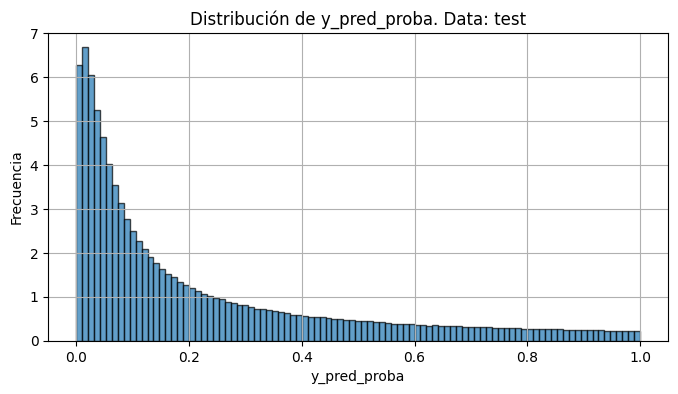

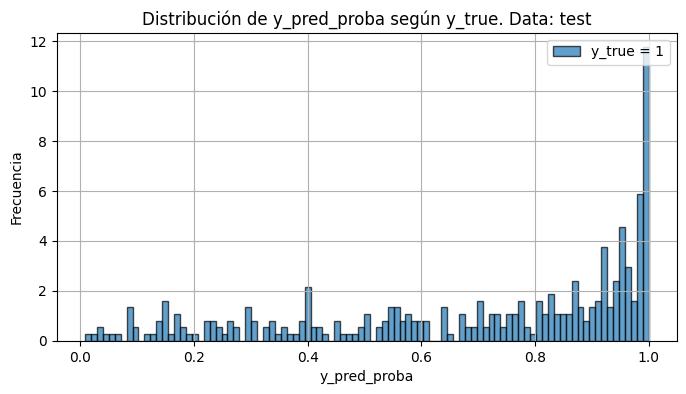

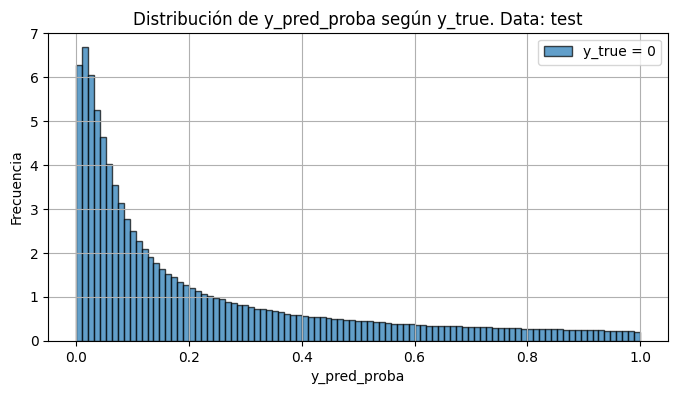

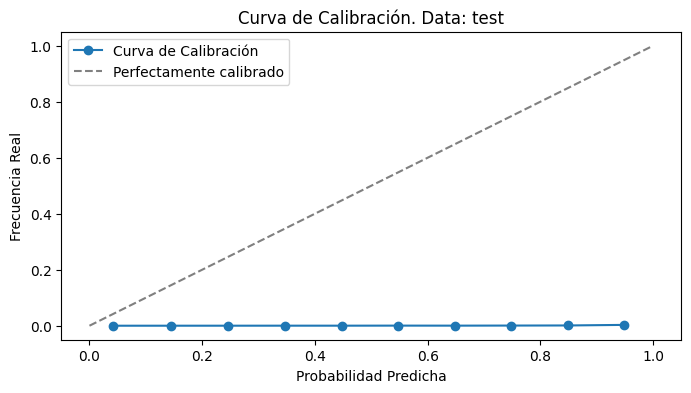

value              name_model  \
class_name metric_name    dataset_name                                   
1          f1-score n_top test          0.1051  [0, 1, 3, 4, 6, 7, 10]   
           true_sum n_top test             322  [0, 1, 3, 4, 6, 7, 10]   
           backtest       test          0.0526  [0, 1, 3, 4, 6, 7, 10]   

                                       model_name       select_model  
class_name metric_name    dataset_name                                
1          f1-score n_top test           Ensamble  modelo_produccion  
           true_sum n_top test           Ensamble  modelo_produccion  
           backtest       test           Ensamble  modelo_produccion

In [23]:
info_save2=ms.calc_metrics_before_backtesting(info_save_all, info_save_temp,params)

In [ ]:
# con eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest'])].reset_index() 
check_df_cientifico = check_df_cientifico.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_cientifico

In [25]:
# sin eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest'])].reset_index()
check_df_cientifico = check_df_cientifico.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_cientifico

metric_name  \
select_model        name_model             dataset_name class_name               
best_fitting_model  Run12                  test         1             backtest   
                                           train        1             backtest   
best_model_name     Run11                  test         1             backtest   
                                           train        1             backtest   
best_unbiased_model Run3                   test         1             backtest   
                                           train        1             backtest   
modelo_produccion   [0, 1, 3, 4, 6, 7, 10] test         1             backtest   
                                           train        1             backtest   

                                                                     value  \
select_model        name_model             dataset_name class_name           
best_fitting_model  Run12                  test         1           0.0332   
                                           train        1           0.0487   
best_model_name     Run11                  test         1           0.0516   
                                           train        1           0.0586   
best_unbiased_model Run3                   test         1           0.0389   
                                           train        1           0.0477   
modelo_produccion   [0, 1, 3, 4, 6, 7, 10] test         1           0.0526   
                                           train        1           0.0582   

                                                                          model_name  
select_model        name_model             dataset_name class_name                    
best_fitting_model  Run12                  test         1           random_forest_11  
                                           train        1           random_forest_11  
best_model_name     Run11                  test         1                 xgboost_10  
                                           train        1                 xgboost_10  
best_unbiased_model Run3                   test         1            random_forest_2  
                                           train        1            random_forest_2  
modelo_produccion   [0, 1, 3, 4, 6, 7, 10] test         1                   Ensamble  
                                           train        1                   Ensamble

In [26]:
# ks en uno de los modeos del ensamble
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_train'].head())
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_test'].head())

prob_min  prob_max  tasa_aperturas
0     98.89    100.00            0.19
1     94.51     98.89            0.13
2     89.00     94.51            0.11
3     83.52     89.00            0.09
4     78.58     83.52            0.06

prob_min  prob_max  tasa_aperturas
0     98.87    100.00            0.10
1     94.45     98.87            0.08
2     88.96     94.45            0.06
3     83.47     88.96            0.08
4     78.58     83.47            0.04

# optimizar ensamblado

In [27]:
train = info_save2['Votaciones']['train']
train2 = train.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_train = ~train.index.isin(train2.index.tolist())
drops = train.index[index_train]
train.shape

test = info_save2['Votaciones']['test']
test2 = test.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_test = ~test.index.isin(test2.index.tolist())
drops2 = test.index[index_test]
#test.index = list(range(test.shape[0]))
test.shape

(2041074, 8)

In [28]:
best_probs = params['n_obs_filter']
best_probs = 0.2
import itertools
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
def calcular_metricas(itter,best_probs = best_probs):
    res = results[itter]
    total_count = res.shape[0]
    selected = res.nlargest(int(total_count * best_probs)).index
    return itter, y_true['y'][selected].sum()  # o la métrica que necesites

In [52]:
mejor_test_dado_mejores_train = True
ignore_train = False

In [59]:
mejor_test_dado_mejores_train = False
ignore_train = True

In [60]:
# Obtener el número de núcleos disponibles
timing = time.time()
num_nucleos = int(cpu_count()/2) # Puedes ajustar este número según sea necesario
msj = ['Train Data','Test Data']
lopps_df = [train,test]
nulls = [drops,drops2]
if ignore_train == True:
    msj = ["test Data"]
    lopps_df = [test]
    nulls = [drops2]
df_model_unic = pd.DataFrame()

for t,df_select in enumerate(lopps_df):
    y_true = df_select[['y']]
    tot = int(y_true.shape[0]*best_probs)
    print("N TOP",tot,".EMPEZAMOS: ",msj[t])
    dropping = nulls[t]
    df_select = df_select.drop('y', axis = 1).drop(dropping, axis = 0)

    if t == 0:
        n = df_select.shape[1]
        # Lista de elementos
        modelos = list(range(0,min(n,3),1)) # el algoritmo se ponderara son con 3 discriminaciones
        # Obtener todas las combinaciones de 2 elementos
        combinaciones = list(itertools.product(modelos, repeat = n))
        combinaciones = pd.DataFrame(combinaciones, columns = df_select.columns.tolist())
        weights = combinaciones.div(combinaciones.sum(axis=1), axis=0).dropna(how = 'all')
        modelos_unicos = []
        for i in range(n):
            filt = combinaciones[combinaciones[combinaciones.columns[i]] == 1]
            filt = filt.drop(combinaciones.columns[i], axis = 1)
            filt = filt.loc[(filt == 0).all(axis=1)]
            modelos_unicos.append(filt.index[0])
        weights_unicos = weights.loc[modelos_unicos]
        weights = weights.drop_duplicates()
    else:
        if mejor_test_dado_mejores_train == True:
            weights = weights.loc[best_iter_w.index.tolist()+modelos_unicos]
        else:
            pass
        #results_train = results.copy()
    logger.info(f"Numero de iteraciones: {weights.shape[0]}. {msj[t]}")
    #results = df_select @ weights.T # observaciones x iteraciones
    results = df_select.astype(np.float32).values @ weights.astype(np.float32).T.values
    results = pd.DataFrame(results, index = df_select.index, columns = weights.T.columns)
    nulos_temp =pd.DataFrame(np.zeros((dropping.shape[0],weights.shape[0])),index = dropping, columns = results.columns)
    results = pd.concat([results,nulos_temp], axis = 0)
    results = results.loc[y_true.index]
    # Usar Pool para paralelizar
    if __name__ == '__main__':
        with Pool(processes=num_nucleos) as pool:  # Especificar el número de núcleos
            resultados = pool.map(calcular_metricas, results.columns)
    
        # Convertir los resultados a un DataFrame
        epochs = pd.DataFrame(resultados, columns=['Iteracion', 'Valor'])
        epochs.set_index('Iteracion', inplace=True)

    maxi_true = epochs['Valor'].max()
    best_iter_w = epochs[epochs['Valor'] == maxi_true]
    trues = y_true['y'].sum()
    logger.info(f"TP: {maxi_true}. True: {trues}. Tasa de Exito: {np.round(maxi_true/tot*100,4)}%. Usando {best_probs} deciles para {msj[t]}")
    if best_iter_w.shape[0] == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}")
        break
    if t == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}")
minutess = (time.time() - timing) /60
hrs = math.floor(minutess / 60)
minutes = minutess - hrs * 60
logger.info(f"Hrs: {hrs}. Min {minutes}")

N TOP 408214 .EMPEZAMOS:  test Data


[12/19/24 15:33:46] INFO     Numero de iteraciones: 2059. test Data                                ]8;id=368943;file:///tmp/ipykernel_21426/2863225296.py\2863225296.py]8;;\:]8;id=628534;file:///tmp/ipykernel_21426/2863225296.py#42\42]8;;\

[12/19/24 15:34:56] INFO     TP: 309.0. True: 359.0. Tasa de Exito: 0.0757%. Usando 0.2 deciles    ]8;id=255298;file:///tmp/ipykernel_21426/2863225296.py\2863225296.py]8;;\:]8;id=310882;file:///tmp/ipykernel_21426/2863225296.py#61\61]8;;\
                             para test Data                                                                        

                    INFO     Hrs: 0. Min 1.163046117623647                                         ]8;id=863131;file:///tmp/ipykernel_21426/2863225296.py\2863225296.py]8;;\:]8;id=956405;file:///tmp/ipykernel_21426/2863225296.py#70\70]8;;\

In [54]:
print(mejor_test_dado_mejores_train)
print(ignore_train)

True
False


In [46]:
epochs_select = (epochs.loc[modelos_unicos]/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_unico = epochs_select.index[0]
print("Mejor modelo Unico")
display(combinaciones.loc[[mejor_unico]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select)
print("Cominaciones e ietraciones de modelos unicos")
display(combinaciones.loc[modelos_unicos])
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_unico,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_unico,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_unico,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Unico


Run1  Run2  Run4  Run5  Run7  Run8  Run11
27     0     0     0     1     0     0      0

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
27         0.0737
243        0.0730
3          0.0715
1          0.0708
9          0.0473
729        0.0461
81         0.0453

Cominaciones e ietraciones de modelos unicos


Run1  Run2  Run4  Run5  Run7  Run8  Run11
729     1     0     0     0     0     0      0
243     0     1     0     0     0     0      0
81      0     0     1     0     0     0      0
27      0     0     0     1     0     0      0
9       0     0     0     0     1     0      0
3       0     0     0     0     0     1      0
1       0     0     0     0     0     0      1

Decil 1:  (27, 0.1274)
Decil 2:  (27, 0.0737)
Decil 3:  (27, 0.0528)


In [48]:
epochs_select = (epochs/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_combinado = epochs_select.index[0]
print("Mejor modelo Iteraciones")
display(combinaciones.loc[[mejor_combinado]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select.head())
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_combinado,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_combinado,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_combinado,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Iteraciones


Run1  Run2  Run4  Run5  Run7  Run8  Run11
522     0     2     0     1     1     0      0

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
522        0.0757
547        0.0757
305        0.0755
1034       0.0755
301        0.0755

Decil 1:  (522, 0.1303)
Decil 2:  (522, 0.0757)
Decil 3:  (522, 0.0534)


In [50]:
# sin eda
iterr = [522,547,305,1034,301] # test best in test
iterr2 = iterr # test best in train
iterr3 = [547,520,304,301,305] # train best in test
iterr4 = iterr3 # train best in train

In [51]:
# sin eda
# test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

Run1  Run2  Run4  Run5  Run7  Run8  Run11
522      0     2     0     1     1     0      0
547      0     2     0     2     0     2      1
305      0     1     0     2     0     2      2
1034     1     1     0     2     0     2      2
301      0     1     0     2     0     1      1

Valor
Iteracion        
522        0.0757
547        0.0757
305        0.0755
1034       0.0755
301        0.0755

In [55]:
# sin eda
# test best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

Run1  Run2  Run4  Run5  Run7  Run8  Run11
522      0     2     0     1     1     0      0
547      0     2     0     2     0     2      1
305      0     1     0     2     0     2      2
1034     1     1     0     2     0     2      2
301      0     1     0     2     0     1      1

Valor
Iteracion        
522        0.0757
547        0.0757
305        0.0755
1034       0.0755
301        0.0755

In [38]:
# sin eda
# train best in test
display(combinaciones.loc[iterr3])
display(epochs_select.loc[iterr3])

Run1  Run2  Run4  Run5  Run7  Run8  Run11
547     0     2     0     2     0     2      1
520     0     2     0     1     0     2      1
304     0     1     0     2     0     2      1
301     0     1     0     2     0     1      1
305     0     1     0     2     0     2      2

Valor
Iteracion        
547        0.0757
520        0.0755
304        0.0755
301        0.0755
305        0.0755

In [39]:
# sin eda
# train best in train
display(combinaciones.loc[iterr4])
display(epochs_select.loc[iterr4])

Run1  Run2  Run4  Run5  Run7  Run8  Run11
547     0     2     0     2     0     2      1
520     0     2     0     1     0     2      1
304     0     1     0     2     0     2      1
301     0     1     0     2     0     1      1
305     0     1     0     2     0     2      2

Valor
Iteracion        
547        0.0757
520        0.0755
304        0.0755
301        0.0755
305        0.0755

In [ ]:
# con eda
iterr = [135,144,108,864,225] # test best in test
iterr2 = iterr # test best in train
iterr3 = [547,520,304,301,305] # train best in test
iterr4 = iterr3 # train best in train

In [ ]:
# con eda
# test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

In [ ]:
# con eda
# test best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

In [ ]:
# con eda
# train best in test
display(combinaciones.loc[iterr3])
display(epochs_select.loc[iterr3])

In [ ]:
# con eda
# train best in train
display(combinaciones.loc[iterr4])
display(epochs_select.loc[iterr4])

In [61]:
combinaciones_interes = list(set([mejor_unico]+iterr+iterr2+iterr3+iterr4))
rangos = sorted(list(set([params['n_obs_filter'],0.01,0.05,0.1,0.2,0.3,0.5])))
print('Iteracion: ',combinaciones_interes)
print('Calling: ',rangos)

Iteracion:  [547, 520, 522, 1034, 301, 304, 305, 27]
Calling:  [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]


In [62]:
# sin eda train
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

0.01    0.05    0.10    0.20    0.30    0.50
Iteraccion                                                
547         0.0500  0.1068  0.1289  0.1514  0.1592  0.1690
520         0.0490  0.1078  0.1274  0.1509  0.1583  0.1690
522         0.0495  0.1044  0.1303  0.1514  0.1602  0.1695
1034        0.0500  0.1019  0.1274  0.1509  0.1578  0.1700
301         0.0495  0.1044  0.1289  0.1509  0.1583  0.1690
304         0.0500  0.1048  0.1284  0.1509  0.1578  0.1690
305         0.0495  0.1034  0.1269  0.1509  0.1578  0.1690
27          0.0451  0.1004  0.1274  0.1475  0.1583  0.1636

In [63]:
# sin eda test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

0.01    0.05    0.10    0.20    0.30    0.50
Iteraccion                                                
547         0.0500  0.1068  0.1289  0.1514  0.1592  0.1690
520         0.0490  0.1078  0.1274  0.1509  0.1583  0.1690
522         0.0495  0.1044  0.1303  0.1514  0.1602  0.1695
1034        0.0500  0.1019  0.1274  0.1509  0.1578  0.1700
301         0.0495  0.1044  0.1289  0.1509  0.1583  0.1690
304         0.0500  0.1048  0.1284  0.1509  0.1578  0.1690
305         0.0495  0.1034  0.1269  0.1509  0.1578  0.1690
27          0.0451  0.1004  0.1274  0.1475  0.1583  0.1636

In [ ]:
# con eda train
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

In [ ]:
# con eda test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

<Axes: ylabel='Iteraccion'>

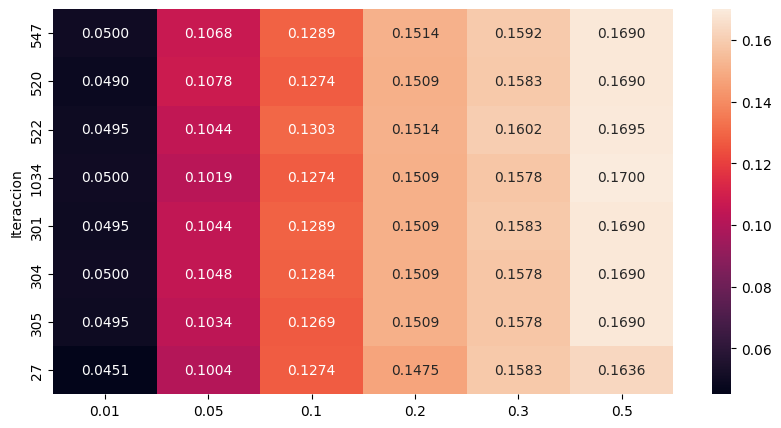

In [67]:
# sin eda train
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".4f")

<Axes: ylabel='Iteraccion'>

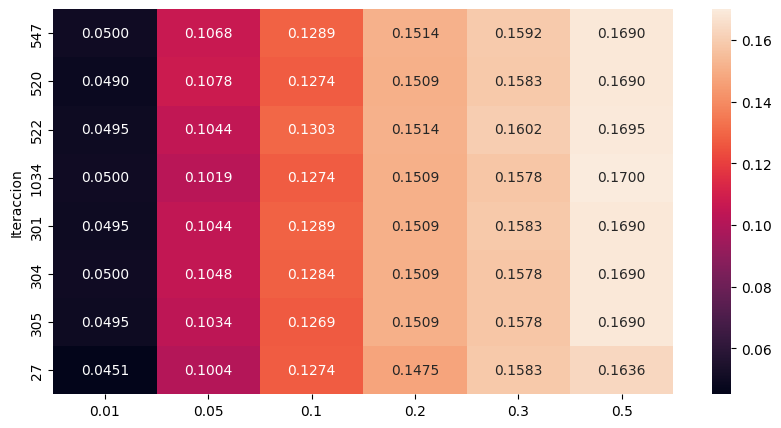

In [66]:
# sin eda train
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".4f")

In [ ]:
# con eda train
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

In [ ]:
# con eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

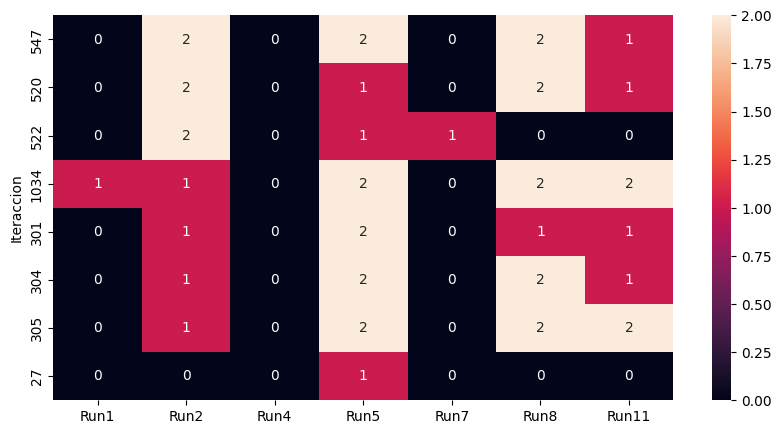

In [68]:
# sin eda
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[summary.index],annot=True)

In [ ]:
# con eda
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[summary.index],annot=True)

In [ ]:
# mejor modelo
check_df

In [ ]:
# MVP2
check_df_mvp2

In [ ]:
# ensamble sin optimizar
check_df_cientifico

In [ ]:
print(info_save2[3]['model_name'])
print(info_save2[3]['name_model'])

In [ ]:
info_save_select_ensamble = catalog.load("info_save_select") # modelo generado
print('Run_name: ',info_save_select_ensamble['modelo_produccion']['nodos_select'])
print('W: ',info_save_select_ensamble['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest','recall n_top','Precision  n_top','f1-score n_top'])].reset_index() 
check_df_opt = check_df_opt[check_df_opt['class_name'].isin([1,1.0,'1','1.0'])]
check_df_opt = check_df_opt.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_opt

[12/19/24 17:52:40] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=422944;file:///opt/conda/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=295657;file:///opt/conda/lib/python3.11/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## backtesting

In [ ]:
#info_save_select = catalog.load("info_save_select") # dio mejor en el backtesting
info_save_select = info_save_select_ensamble.copy()
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest','recall n_top','Precision  n_top','f1-score n_top'])].reset_index() 
check_df_opt = check_df_opt[check_df_opt['class_name'].isin([1,1.0,'1','1.0'])]
check_df_opt = check_df_opt.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_opt

value  \
metric_name    dataset_name class_name select_model        name_model           
backtest       test         1          best_fitting_model  Run12       0.0332   
                                       best_model_name     Run11       0.0516   
                                       best_unbiased_model Run3        0.0389   
                                       modelo_produccion   [1, 4, 6]   0.0534   
               train        1          best_fitting_model  Run12       0.0487   
                                       best_model_name     Run11       0.0586   
                                       best_unbiased_model Run3        0.0477   
                                       modelo_produccion   [1, 4, 6]   0.0583   
f1-score n_top test         1          best_fitting_model  Run12       0.0663   
                                       best_model_name     Run11       0.1032   
                                       best_unbiased_model Run3        0.0777   
                                       modelo_produccion   [1, 4, 6]   0.1067   
               train        1          best_fitting_model  Run12       0.0974   
                                       best_model_name     Run11       0.1172   
                                       best_unbiased_model Run3        0.0954   
                                       modelo_produccion   [1, 4, 6]   0.1166   
recall n_top   test         1          best_fitting_model  Run12        100.0   
                                       best_model_name     Run11        100.0   
                                       best_unbiased_model Run3         100.0   
                                       modelo_produccion   [1, 4, 6]    100.0   
               train        1          best_fitting_model  Run12        100.0   
                                       best_model_name     Run11        100.0   
                                       best_unbiased_model Run3         100.0   
                                       modelo_produccion   [1, 4, 6]    100.0   

                                                                             model_name  
metric_name    dataset_name class_name select_model        name_model                    
backtest       test         1          best_fitting_model  Run12       random_forest_11  
                                       best_model_name     Run11             xgboost_10  
                                       best_unbiased_model Run3         random_forest_2  
                                       modelo_produccion   [1, 4, 6]           Ensamble  
               train        1          best_fitting_model  Run12       random_forest_11  
                                       best_model_name     Run11             xgboost_10  
                                       best_unbiased_model Run3         random_forest_2  
                                       modelo_produccion   [1, 4, 6]           Ensamble  
f1-score n_top test         1          best_fitting_model  Run12       random_forest_11  
                                       best_model_name     Run11             xgboost_10  
                                       best_unbiased_model Run3         random_forest_2  
                                       modelo_produccion   [1, 4, 6]           Ensamble  
               train        1          best_fitting_model  Run12       random_forest_11  
                                       best_model_name     Run11             xgboost_10  
                                       best_unbiased_model Run3         random_forest_2  
                                       modelo_produccion   [1, 4, 6]           Ensamble  
recall n_top   test         1          best_fitting_model  Run12       random_forest_11  
                                       best_model_name     Run11             xgboost_10  
                                       best_unbiased_model Run3         random_forest_2  
                                       modelo_produccion   [1, 4, 6]       

In [ ]:
try:
    display(info_save_select["modelo_produccion"]['Scaler'].reindex_OneHotEncoding)
    display(info_save_select["modelo_produccion"]['ks_test'])
    display(info_save_select["modelo_produccion"]['ks_train'])
except:
    display(info_save_select[info_save_select["modelo_produccion"]['nodos_select'][0]]['Scaler'].reindex_OneHotEncoding)

REINDEX     generacion
llave                                              
0             generacion__centennial  _generacion_x
1           generacion__generacion_x    _millennial
2             generacion__millennial    _centennial
DROP_FIRST                       NaN   _baby_boomer

In [ ]:
print(info_save_select["modelo_produccion"]["model_name"])
print(info_save_select["modelo_produccion"]["name_model"])
if info_save_select["modelo_produccion"]["model_name"] == "Ensamble":
    print(info_save_select["modelo_produccion"]["nodos_select"])
    print(info_save_select["modelo_produccion"]["weights"])

Ensamble

[1, 4, 6]
[2, 1, 1]


In [ ]:
save_backtesting = catalog.load("data_backtesting")

[12/19/24 21:58:02] INFO     Loading data from 'data_backtesting' (PickleDataSet)...            ]8;id=431491;file:///opt/conda/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=292513;file:///opt/conda/lib/python3.11/site-packages/kedro/io/data_catalog.py#502\502]8;;\

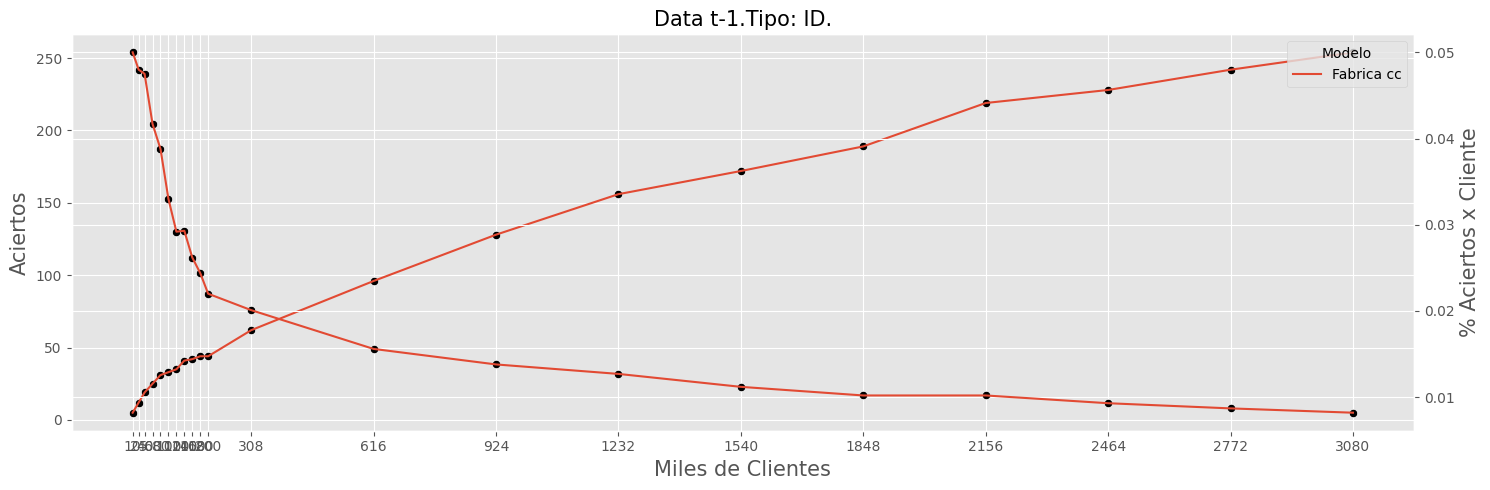

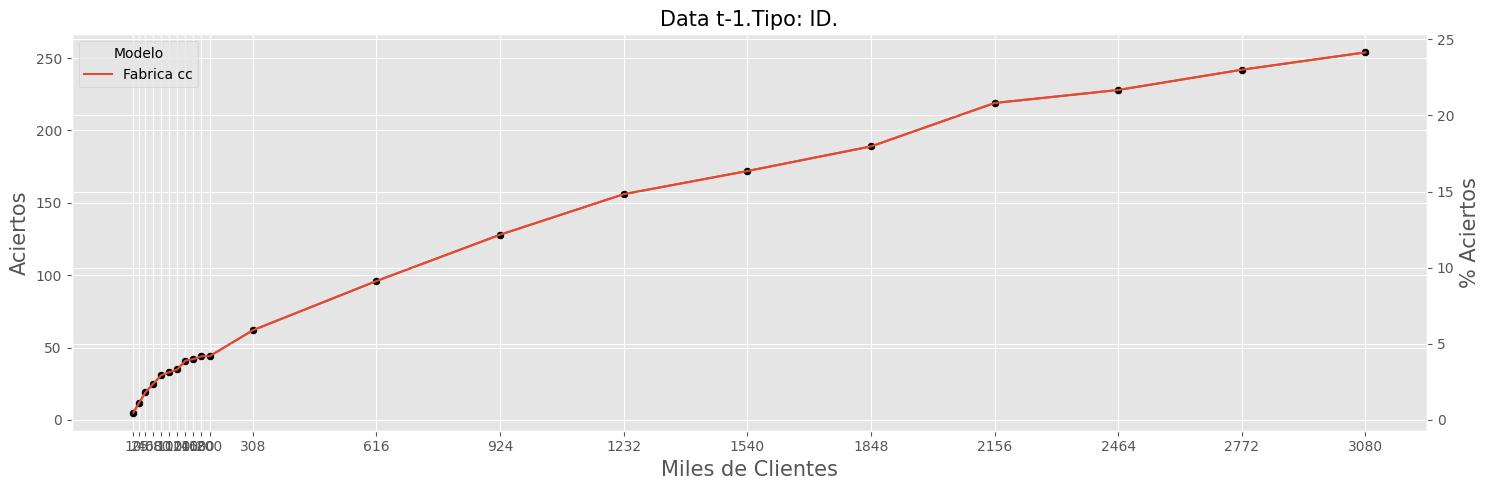

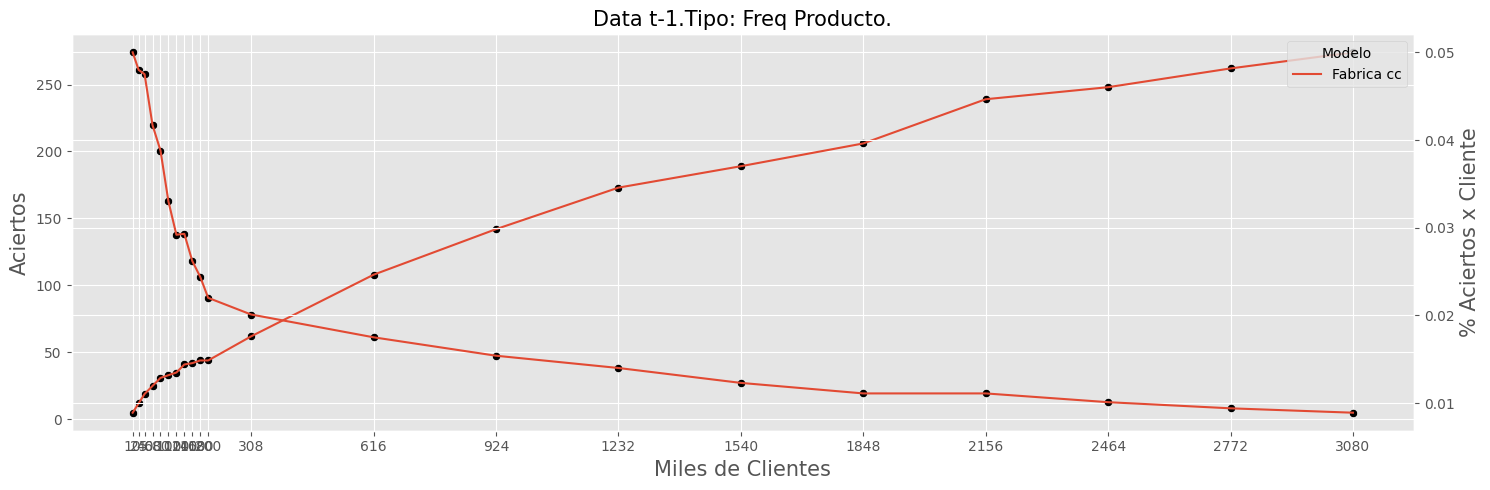

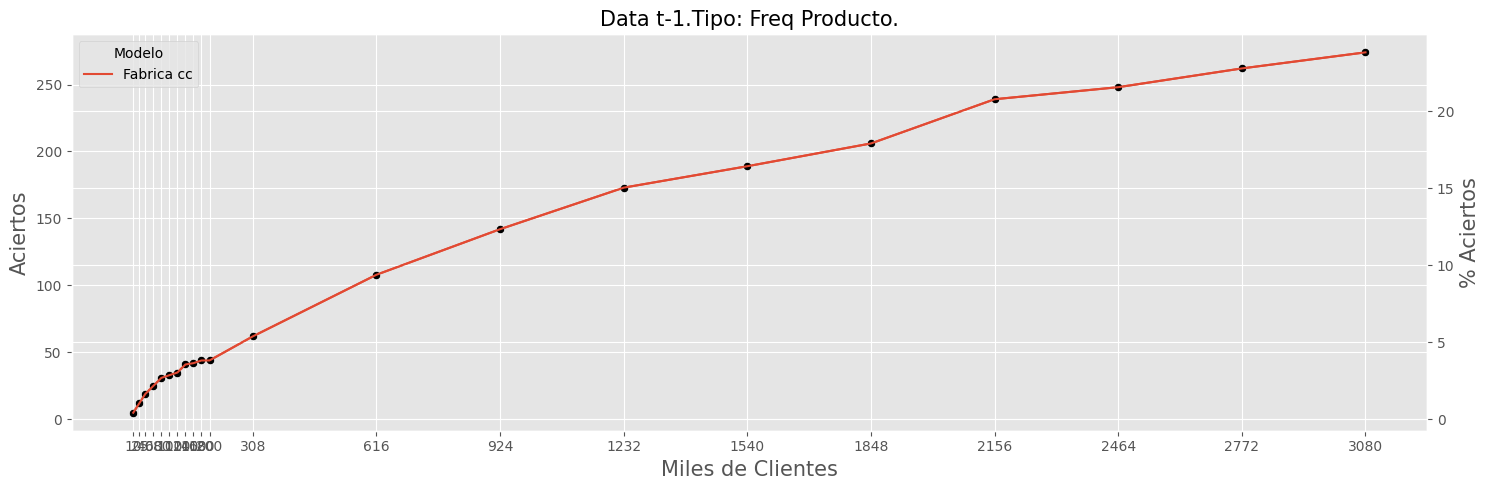

[12/19/24 22:08:24] INFO     ---------------------------------------------------                       ]8;id=681030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=418082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

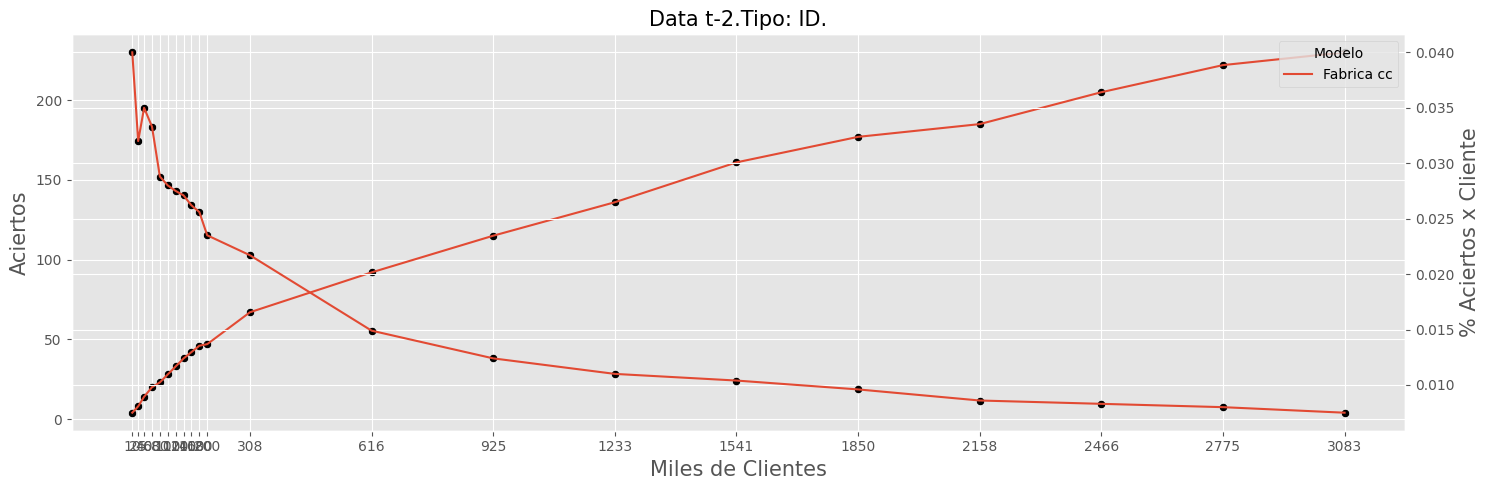

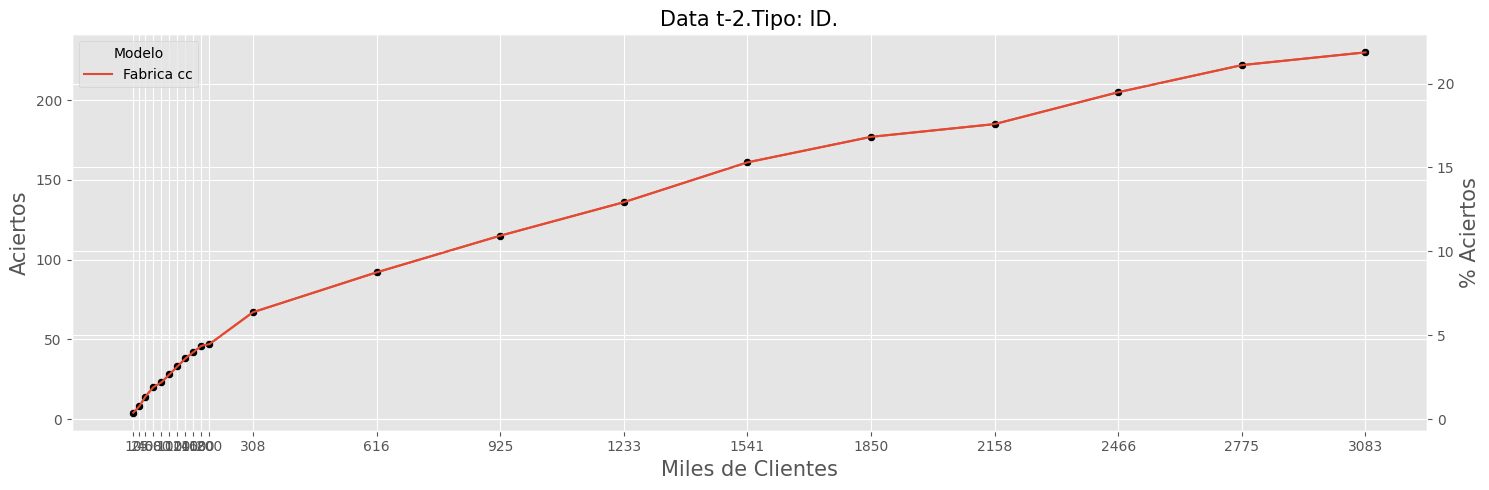

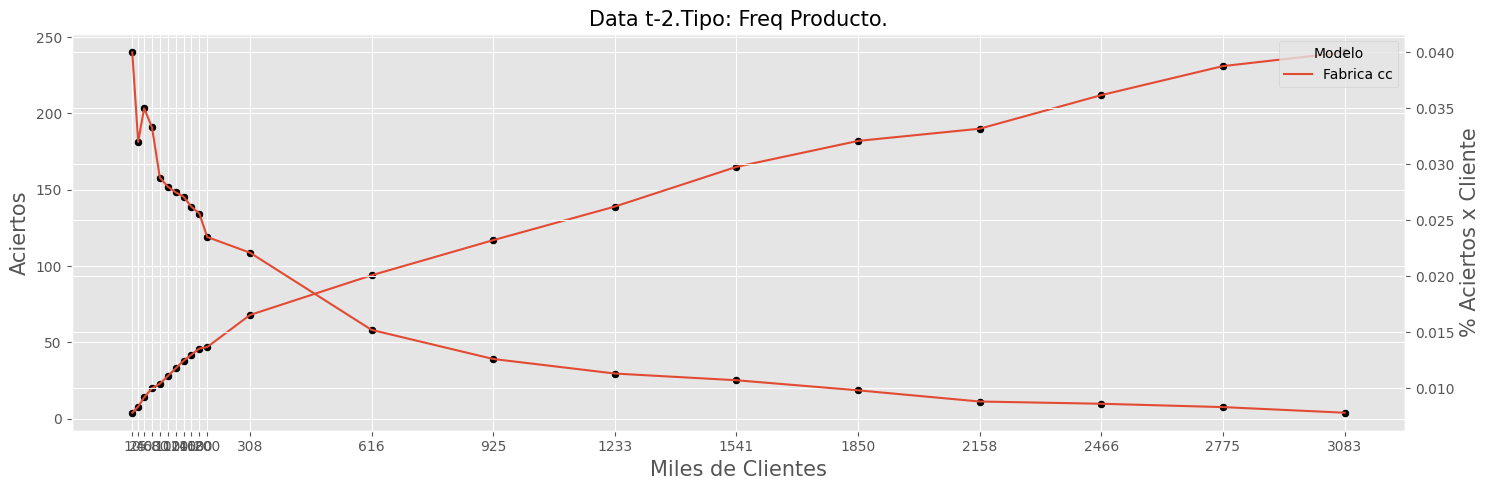

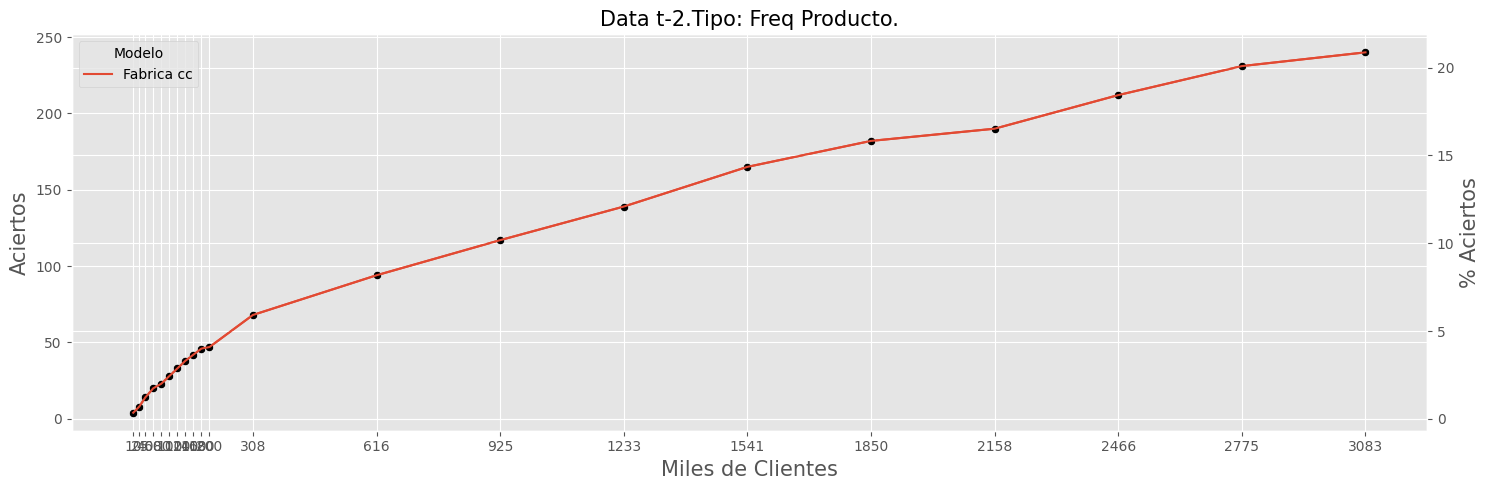

[12/19/24 22:08:26] INFO     ---------------------------------------------------                       ]8;id=840851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=258559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

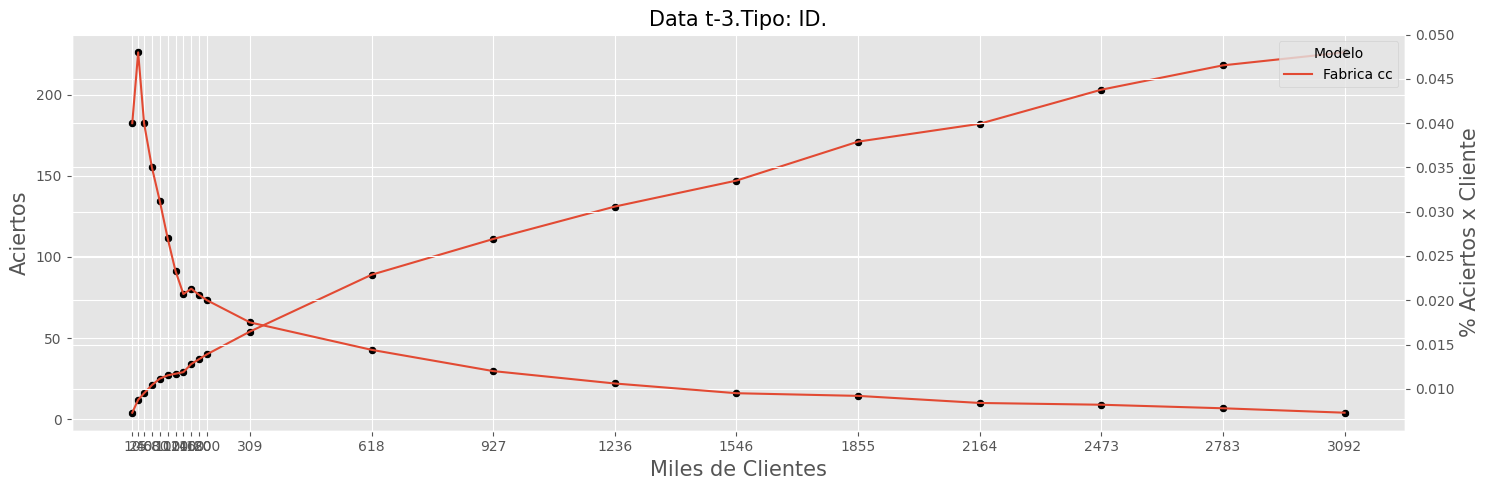

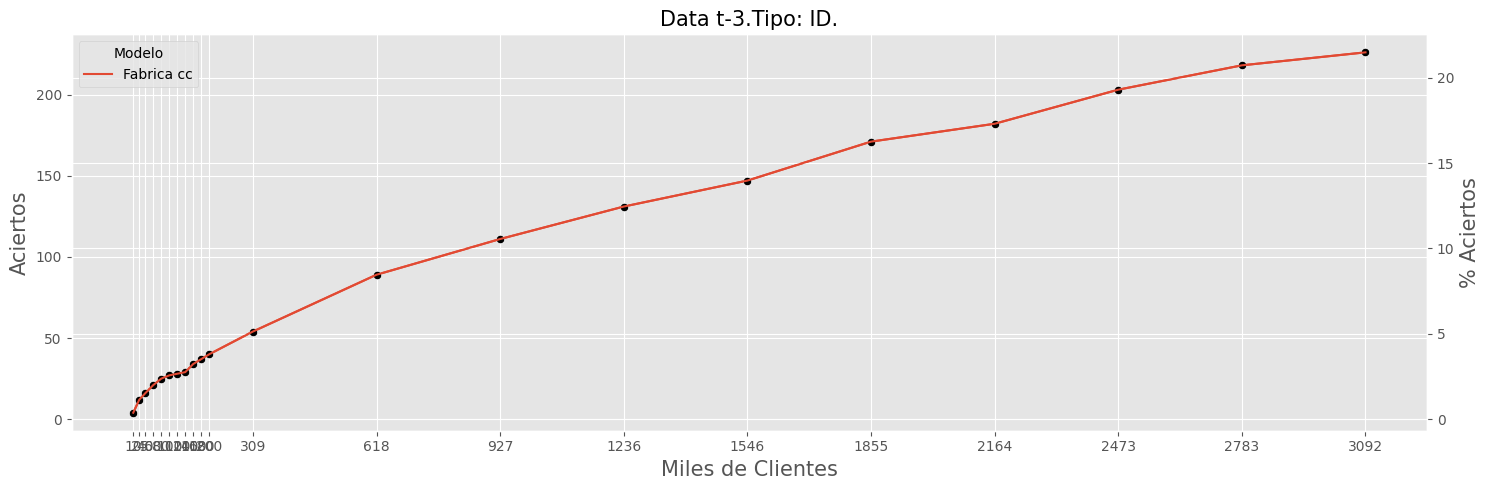

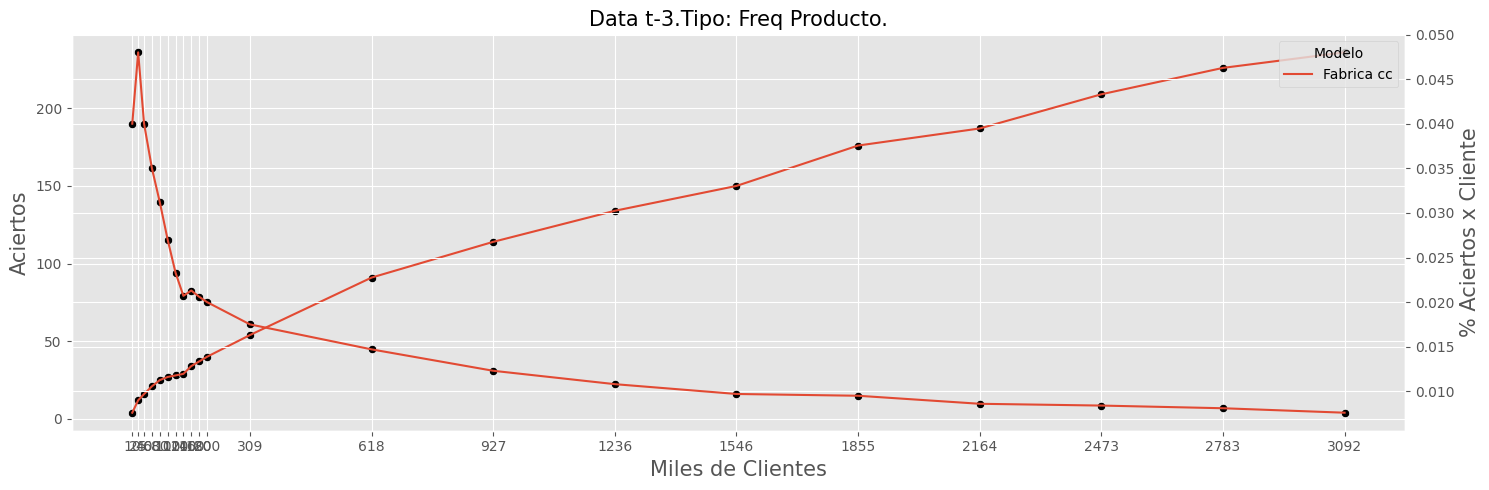

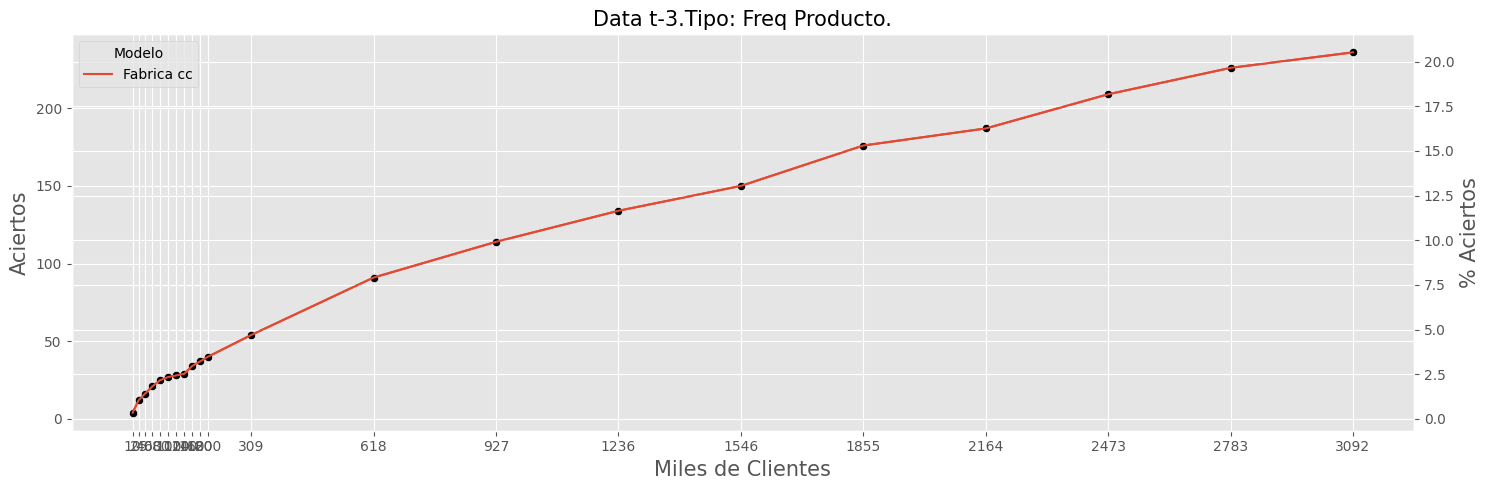

[12/19/24 22:08:27] INFO     ---------------------------------------------------                       ]8;id=838741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=637704;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

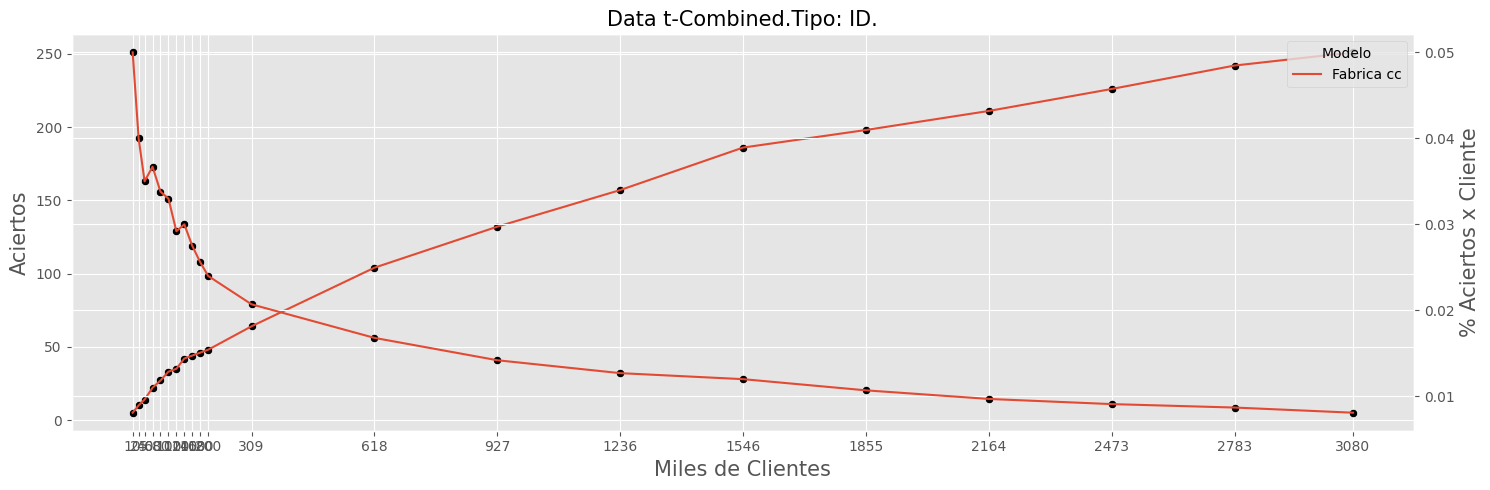

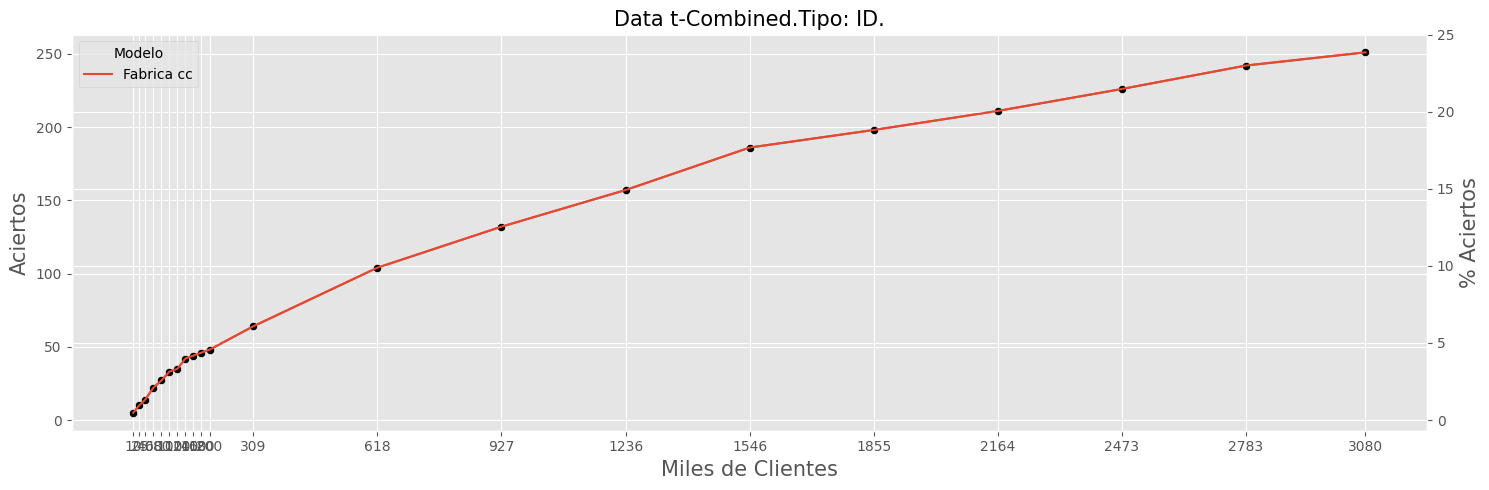

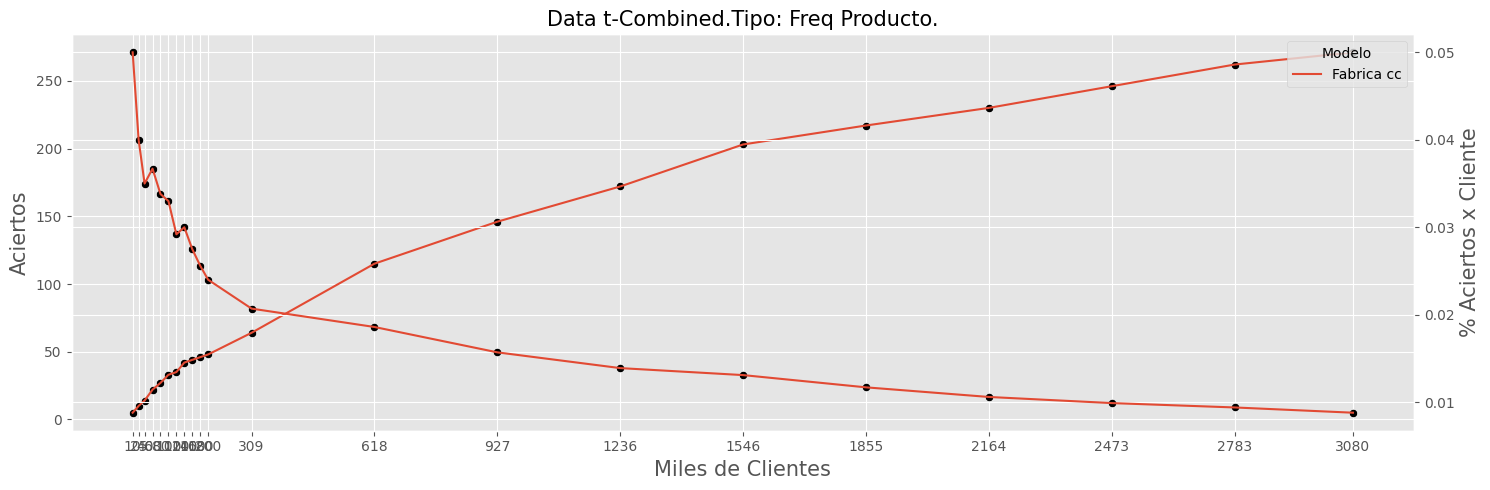

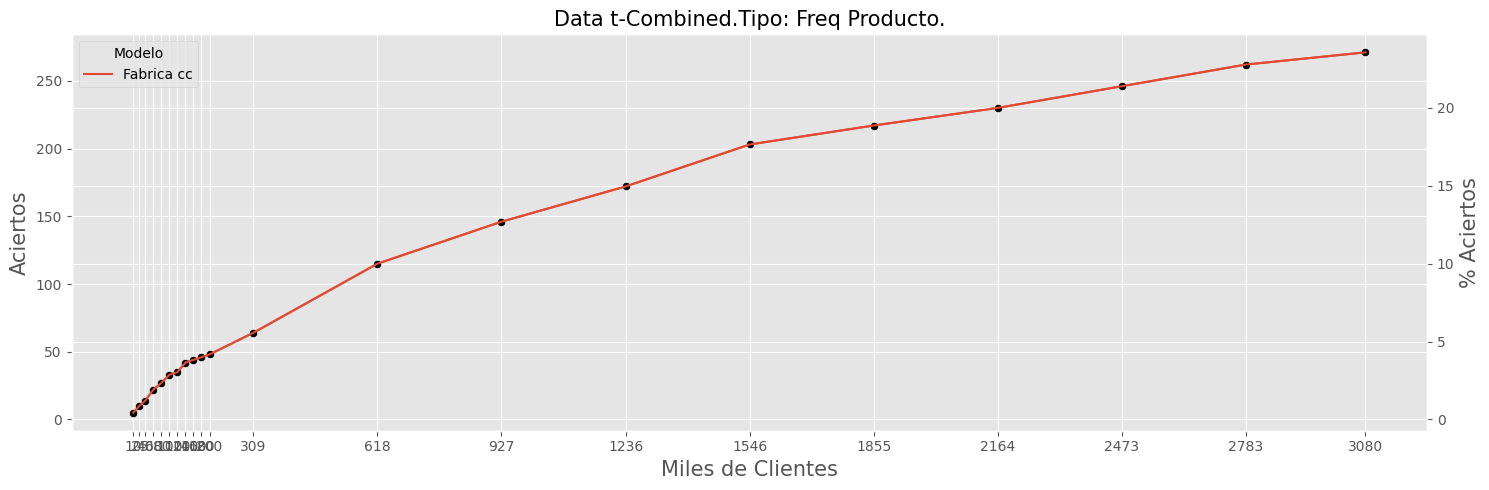

[12/19/24 22:08:29] INFO     ---------------------------------------------------                       ]8;id=416174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=647359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

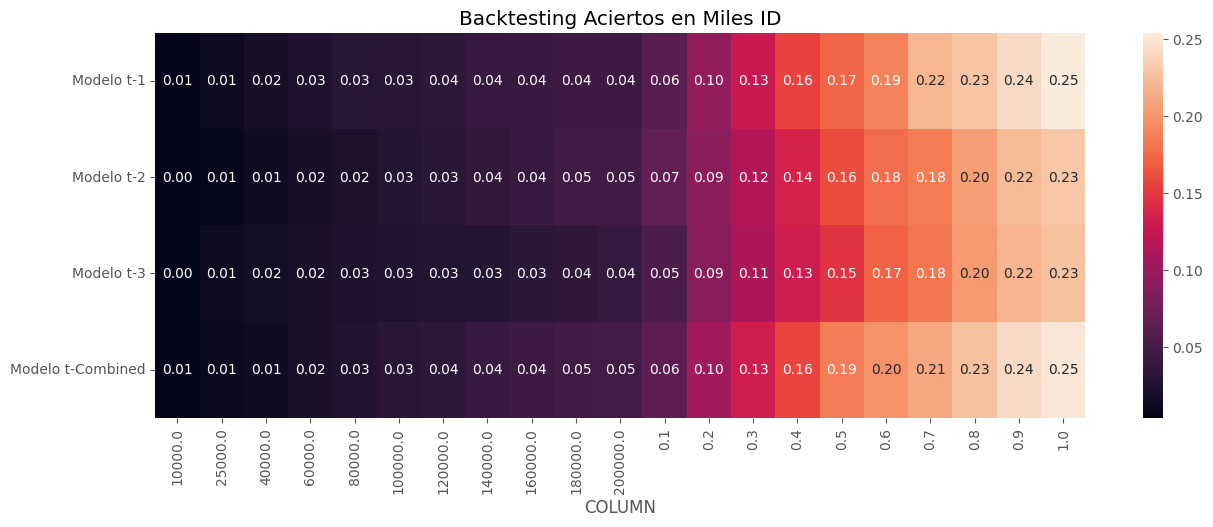

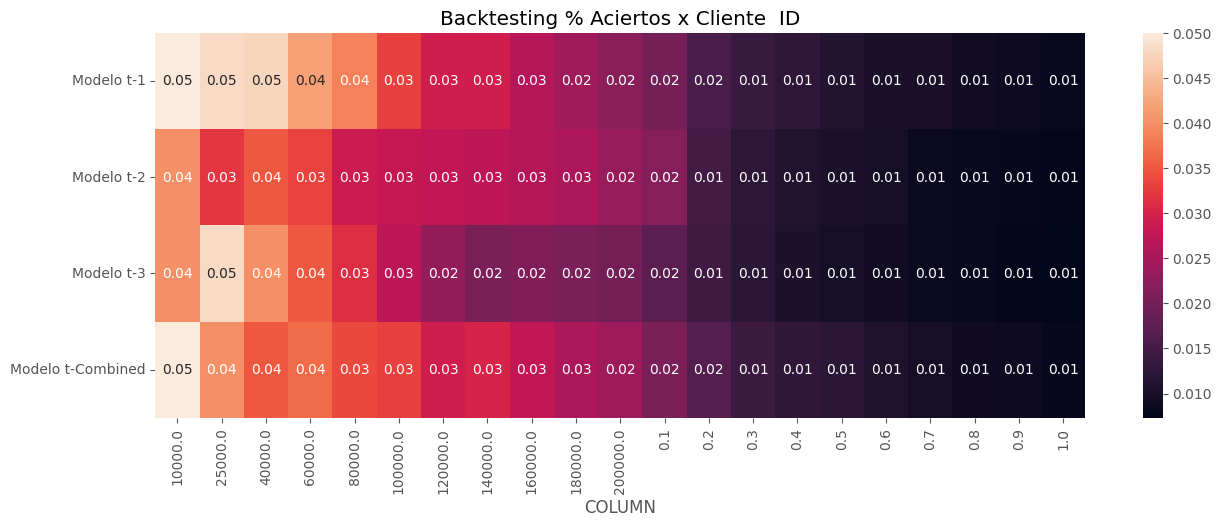

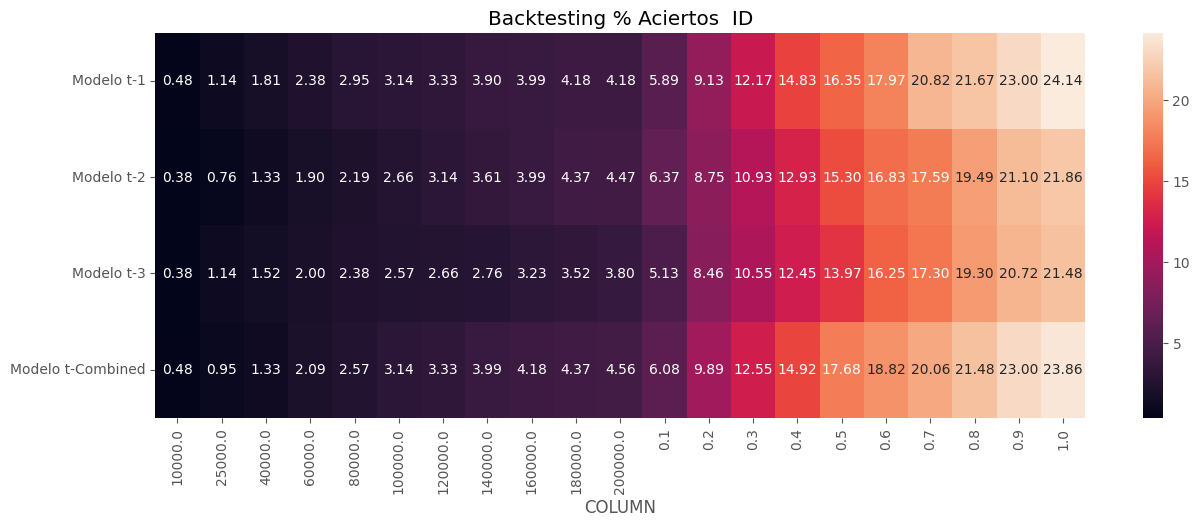

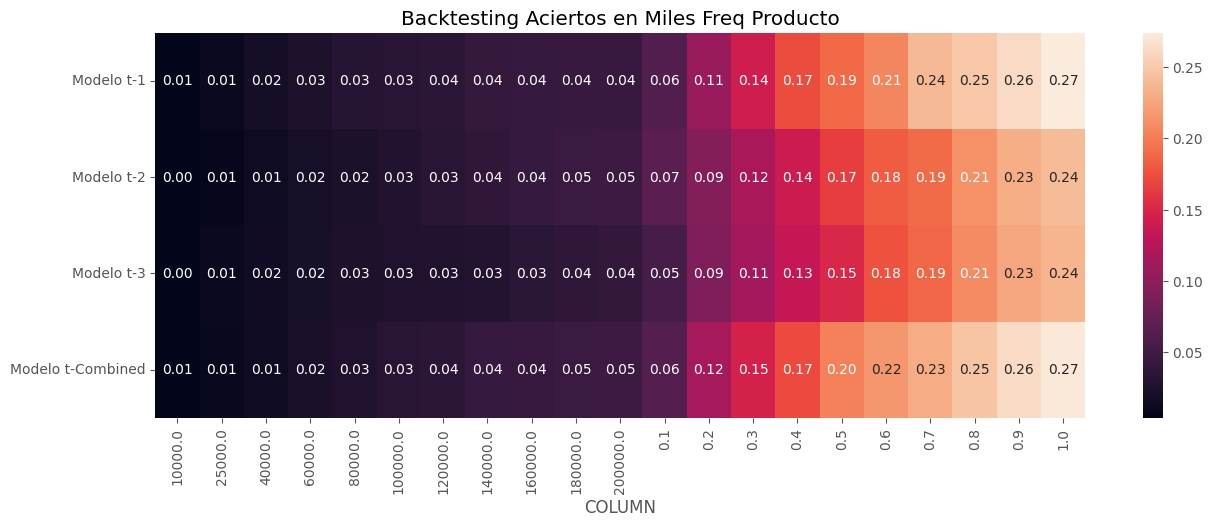

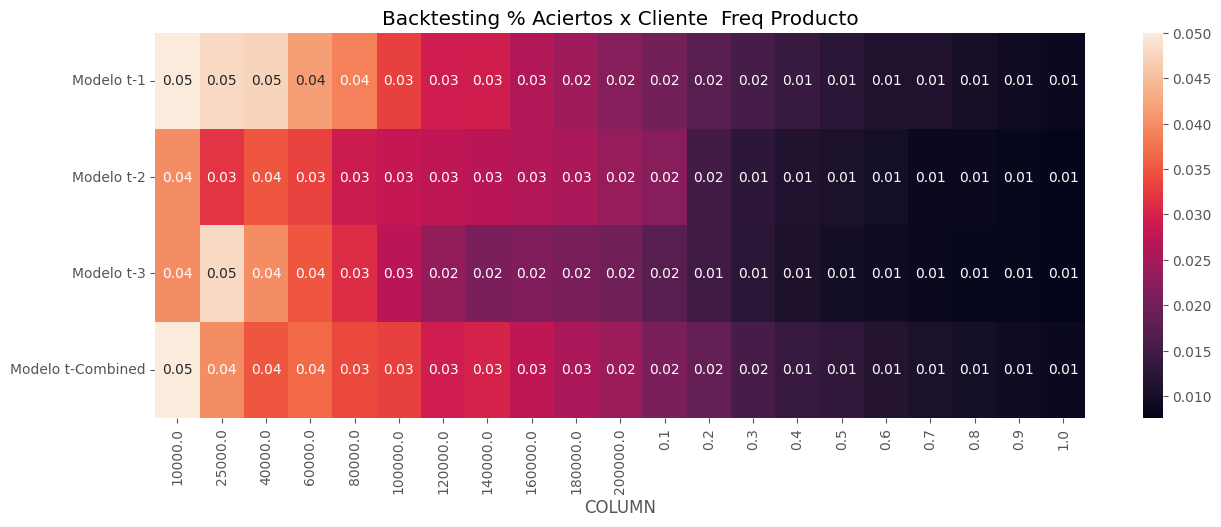

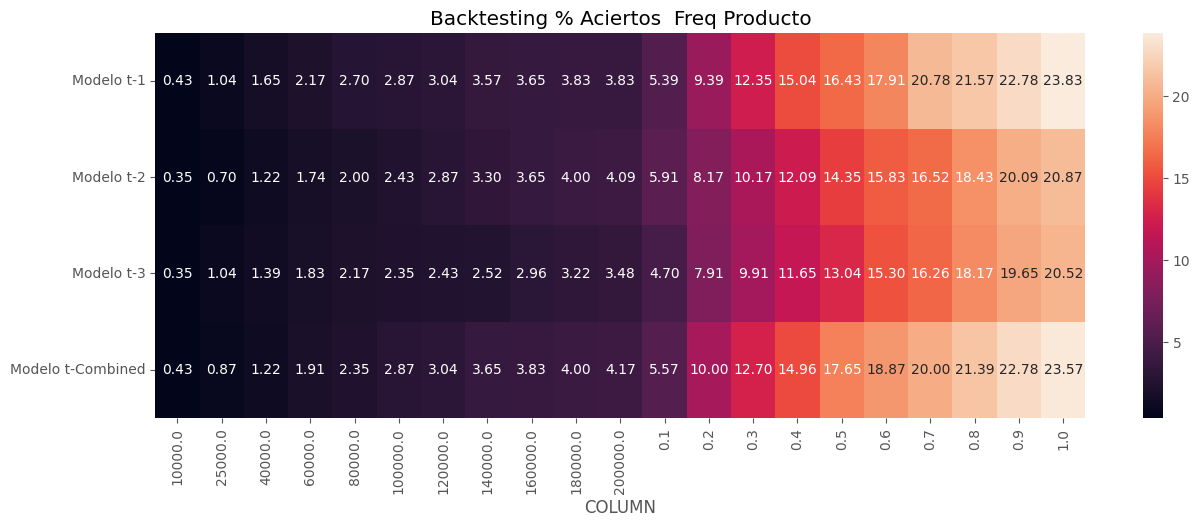

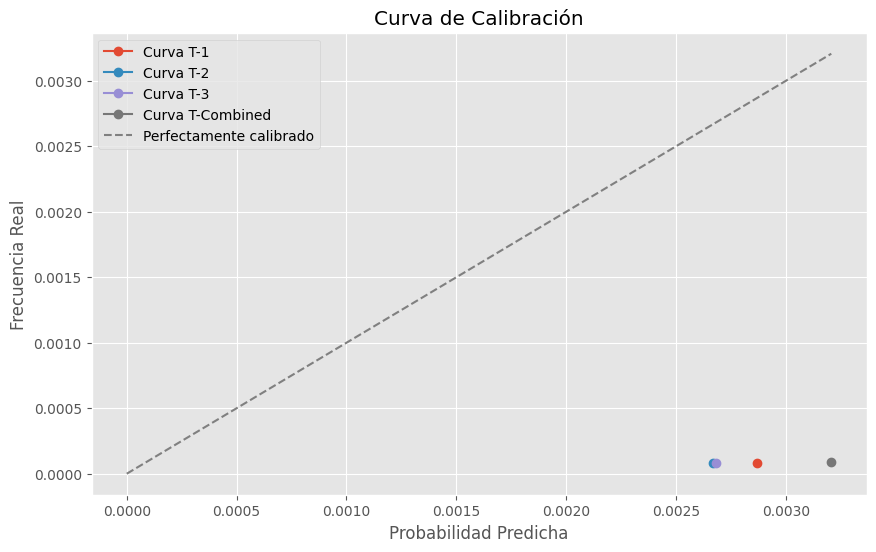

In [12]:
backtesting.plotear_curvas_rezago(save_backtesting, params)
plt.figure(figsize=(10, 6))
max_value = 0
for i in save_backtesting.keys():
    prob_true = save_backtesting[i]['prob_true']
    prob_pred = save_backtesting[i]['prob_pred']
    # Graficar la curva de calibración
    try:
        msg = str(int(i))
    except:
        msg = str(i)
    plt.plot(prob_pred, prob_true, marker='o', label='Curva'+" T-"+msg)
    max_value = np.max([max_value,np.max(prob_pred)])
plt.plot([0, max_value], [0, max_value], linestyle='--', color='gray', label='Perfectamente calibrado')
plt.title('Curva de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia Real')
plt.legend()
plt.show()
# curva > 45 grados = subestimar
# curva < 45 grados = sobrestimar

In [15]:
for i in save_backtesting.keys():
    print(i)
    res = save_backtesting[i]['metrics']
    display(res[res["metric_name"].isin(['No medible 1 %','N_top','f1-score','backtest_metric_ntop'])].drop('timestamp', axis=1))
    display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])

1


model_name model_type dataset_name           metric_name     metric_type  \
1          CC  Ensamble,       202409        No medible 1 %  overall metric   
3          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
4          CC  Ensamble,       202409                 N_top  overall metric   
8          CC  Ensamble,       202409              f1-score  overall metric   
18         CC  Ensamble,       202409              f1-score    class metric   
22         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
1     overall       2.5467  
3     overall       0.0142  
4     overall  924263.0000  
8     overall       0.0169  
18        0.0       0.0000  
22        1.0       0.0169

timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-19 21:46         CC  Ensamble,       202409   True positives   
10  2024-12-19 21:46         CC  Ensamble,       202409  False negatives   
11  2024-12-19 21:46         CC  Ensamble,       202409   True negatives   
12  2024-12-19 21:46         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
9   overall metric    overall      254.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  3002163.0

2


model_name model_type dataset_name           metric_name     metric_type  \
2          CC  Ensamble,       202409        No medible 1 %  overall metric   
5          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          CC  Ensamble,       202409                 N_top  overall metric   
10         CC  Ensamble,       202409              f1-score  overall metric   
20         CC  Ensamble,       202409              f1-score    class metric   
24         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
2     overall       4.7932  
5     overall       0.0125  
6     overall  925038.0000  
10    overall       0.0157  
20        0.0       0.0004  
24        1.0       0.0157

timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-19 21:47         CC  Ensamble,       202409   True positives   
12  2024-12-19 21:47         CC  Ensamble,       202409  False negatives   
13  2024-12-19 21:47         CC  Ensamble,       202409   True negatives   
14  2024-12-19 21:47         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall      230.0  
12  overall metric    overall        0.0  
13  overall metric    overall        6.0  
14  overall metric    overall  2935427.0

3


model_name model_type dataset_name           metric_name     metric_type  \
2          CC  Ensamble,       202409        No medible 1 %  overall metric   
5          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          CC  Ensamble,       202409                 N_top  overall metric   
10         CC  Ensamble,       202409              f1-score  overall metric   
20         CC  Ensamble,       202409              f1-score    class metric   
24         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
2     overall       7.2170  
5     overall       0.0125  
6     overall  927688.0000  
10    overall       0.0158  
20        0.0       0.0004  
24        1.0       0.0158

timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-19 21:47         CC  Ensamble,       202409   True positives   
12  2024-12-19 21:47         CC  Ensamble,       202409  False negatives   
13  2024-12-19 21:47         CC  Ensamble,       202409   True negatives   
14  2024-12-19 21:47         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall      226.0  
12  overall metric    overall        0.0  
13  overall metric    overall        6.0  
14  overall metric    overall  2868890.0

Combined


model_name model_type dataset_name           metric_name     metric_type  \
1          CC  Ensamble,       202409        No medible 1 %  overall metric   
3          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
4          CC  Ensamble,       202409                 N_top  overall metric   
8          CC  Ensamble,       202409              f1-score  overall metric   
18         CC  Ensamble,       202409              f1-score    class metric   
22         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
1     overall       5.4775  
3     overall       0.0147  
4     overall  924264.0000  
8     overall       0.0172  
18        0.0       0.0000  
22        1.0       0.0172

timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-19 21:47         CC  Ensamble,       202409   True positives   
10  2024-12-19 21:47         CC  Ensamble,       202409  False negatives   
11  2024-12-19 21:47         CC  Ensamble,       202409   True negatives   
12  2024-12-19 21:47         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
9   overall metric    overall      251.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2911873.0

In [16]:
for i in save_backtesting.keys():
    print(i)
    res = save_backtesting[i]['ks']
    display(res)

1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.36      0.38          308088               62            0.02   
1      9      0.35      0.36          308088               34            0.01   
2      8      0.34      0.35          308088               32            0.01   
3      7      0.33      0.34          308088               28            0.01   
4      6      0.32      0.33          308087               16            0.01   
5      5      0.30      0.32          308088               17            0.01   
6      4      0.27      0.30          308088               30            0.01   
7      3      0.23      0.27          308088                9            0.00   
8      2      0.15      0.23          308049               14            0.00   
9      1      0.01      0.15          308127               12            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          24.41                10.0    14.41  
1          37.80                20.0    17.80  
2          50.39                30.0    20.39  
3          61.42                40.0    21.42  
4          67.72                50.0    17.72  
5          74.41                60.0    14.41  
6          86.22                70.0    16.22  
7          89.76                80.0     9.76  
8          95.28                90.0     5.28  
9         100.00               100.0     0.00

2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.35      0.38          308346               67            0.02   
1      9      0.34      0.35          308346               25            0.01   
2      8      0.33      0.34          308346               23            0.01   
3      7      0.32      0.33          308346               21            0.01   
4      6      0.29      0.32          308346               25            0.01   
5      5      0.26      0.29          308346               16            0.01   
6      4      0.23      0.26          308346                8            0.00   
7      3      0.17      0.23          308346               20            0.01   
8      2      0.12      0.17          308346               17            0.01   
9      1      0.00      0.12          308346                8            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          29.13                10.0    19.13  
1          40.00                20.0    20.00  
2          50.00                30.0    20.00  
3          59.13                40.0    19.13  
4          70.00                50.0    20.00  
5          76.96                60.0    16.96  
6          80.43                70.0    10.43  
7          89.13                80.0     9.13  
8          96.52                90.0     6.52  
9         100.00               100.0     0.00

3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.35      0.38          309230               54            0.02   
1      9      0.34      0.35          309229               35            0.01   
2      8      0.33      0.34          309082               22            0.01   
3      7      0.32      0.33          309377               20            0.01   
4      6      0.29      0.32          309229               16            0.01   
5      5      0.26      0.29          309230               24            0.01   
6      4      0.23      0.26          309216               11            0.00   
7      3      0.17      0.23          309243               21            0.01   
8      2      0.12      0.17          309229               15            0.00   
9      1      0.00      0.12          309230                8            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          23.89                10.0    13.89  
1          39.38                20.0    19.38  
2          49.12                30.0    19.12  
3          57.96                40.0    17.96  
4          65.04                50.0    15.04  
5          75.66                60.0    15.66  
6          80.53                70.0    10.53  
7          89.82                80.0     9.82  
8          96.46                90.0     6.46  
9         100.00               100.0     0.00

Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.36      0.38          308088               64            0.02   
1      9      0.36      0.36          308088               40            0.01   
2      8      0.35      0.36          308088               28            0.01   
3      7      0.34      0.35          308088               25            0.01   
4      6      0.34      0.34          308088               29            0.01   
5      5      0.33      0.34          308088               12            0.00   
6      4      0.31      0.33          308088               12            0.00   
7      3      0.29      0.31          308088               15            0.00   
8      2      0.24      0.29          308088               17            0.01   
9      1      0.13      0.24          308088                9            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          25.50                10.0    15.50  
1          41.43                20.0    21.43  
2          52.59                30.0    22.59  
3          62.55                40.0    22.55  
4          74.10                50.0    24.10  
5          78.88                60.0    18.88  
6          83.67                70.0    13.67  
7          89.64                80.0     9.64  
8          96.41                90.0     6.41  
9         100.00               100.0     0.00

## Comparacion de modelos

In [8]:
data_backtesting1 = catalog.load("data_backtesting_202410")
data_backtesting2 = catalog.load("data_backtesting_202411")
#data_backtesting3 = catalog.load("data_backtesting_sin_eda")

[12/20/24 15:26:09] INFO     Loading data from 'data_backtesting_202410' (PickleDataSet)...     ]8;id=804914;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=280770;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

[12/20/24 15:29:50] INFO     Loading data from 'data_backtesting_202411' (PickleDataSet)...     ]8;id=91952;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=268239;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

dict_keys(['ID', 'Freq Producto'])


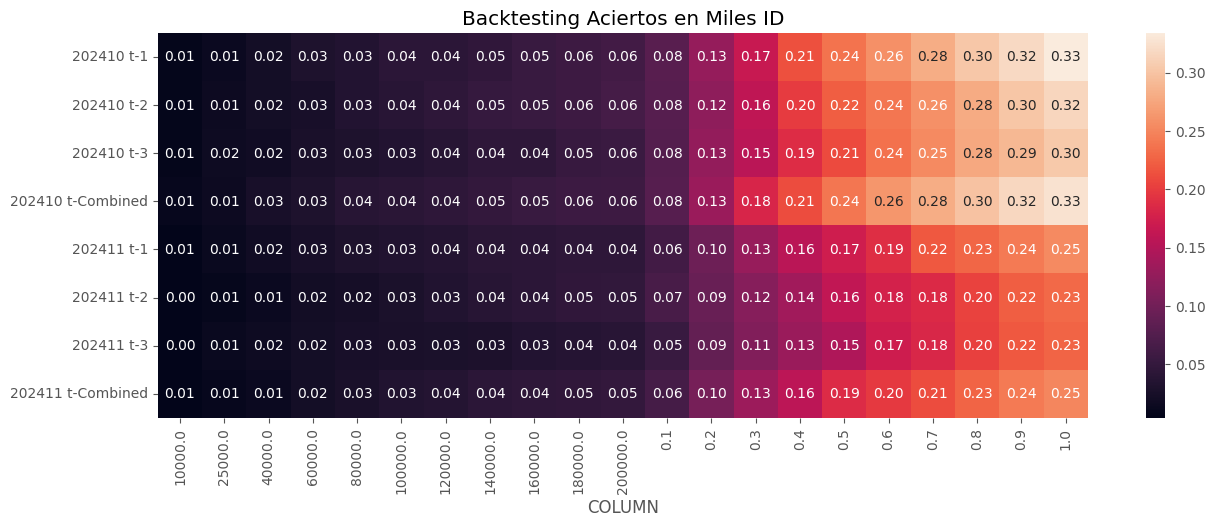

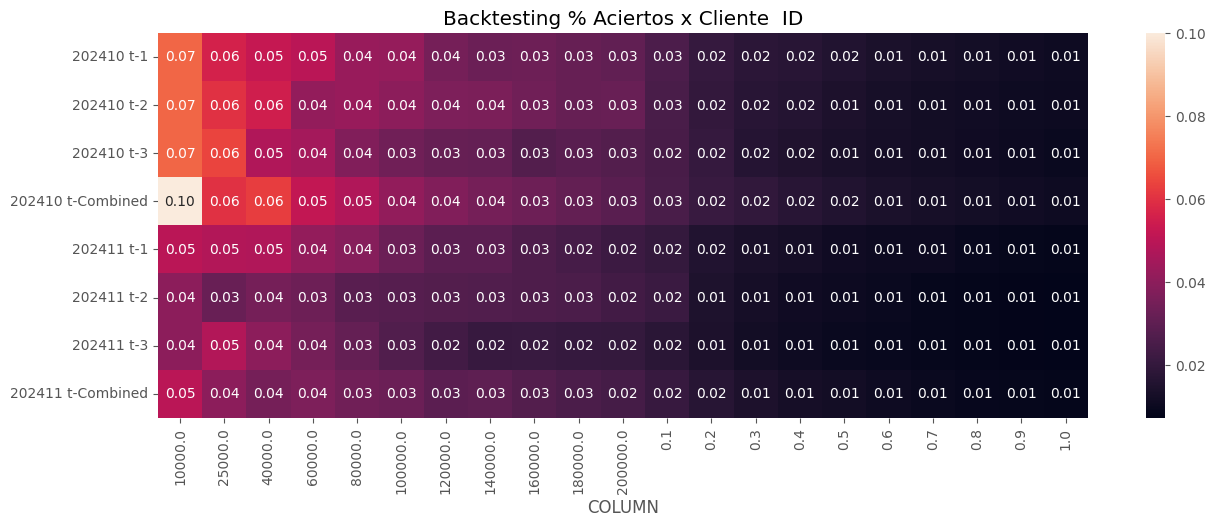

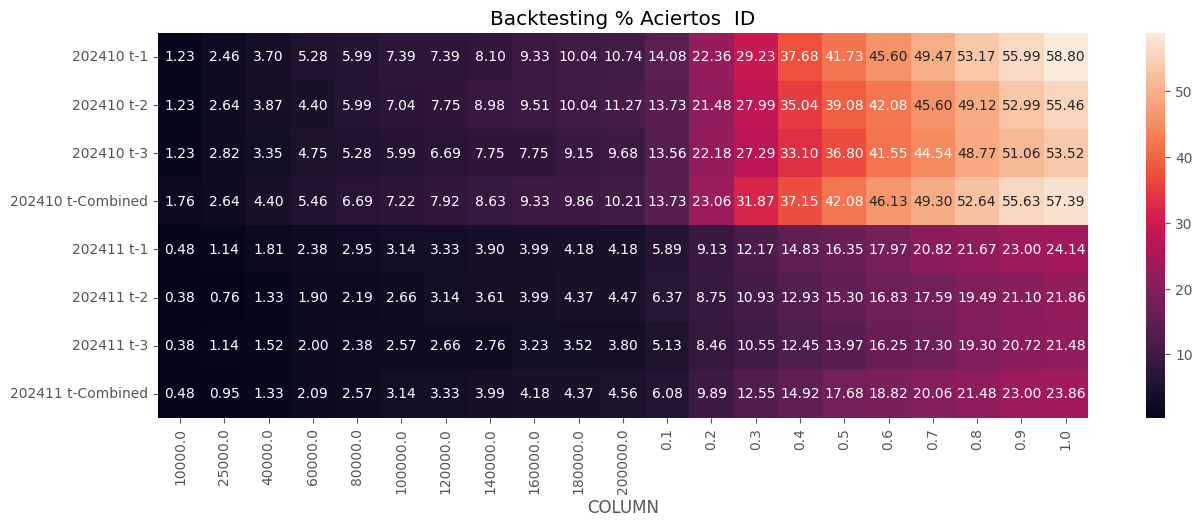

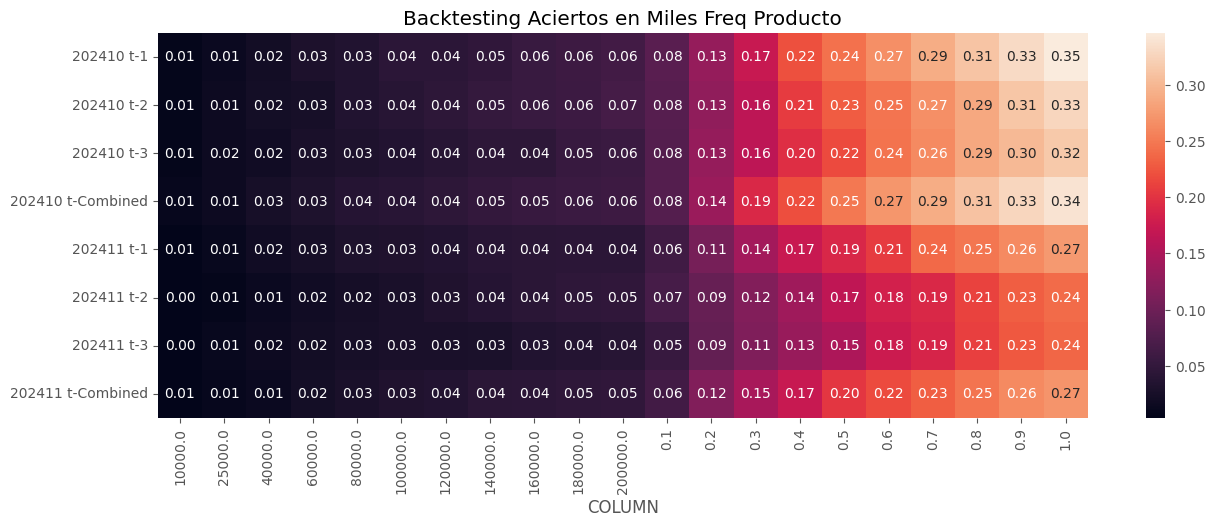

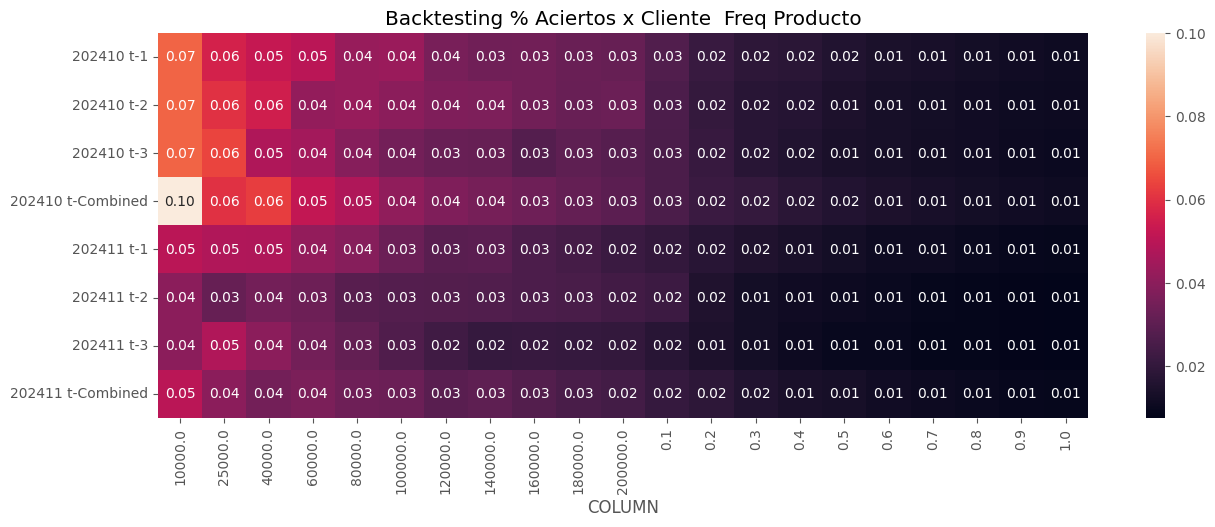

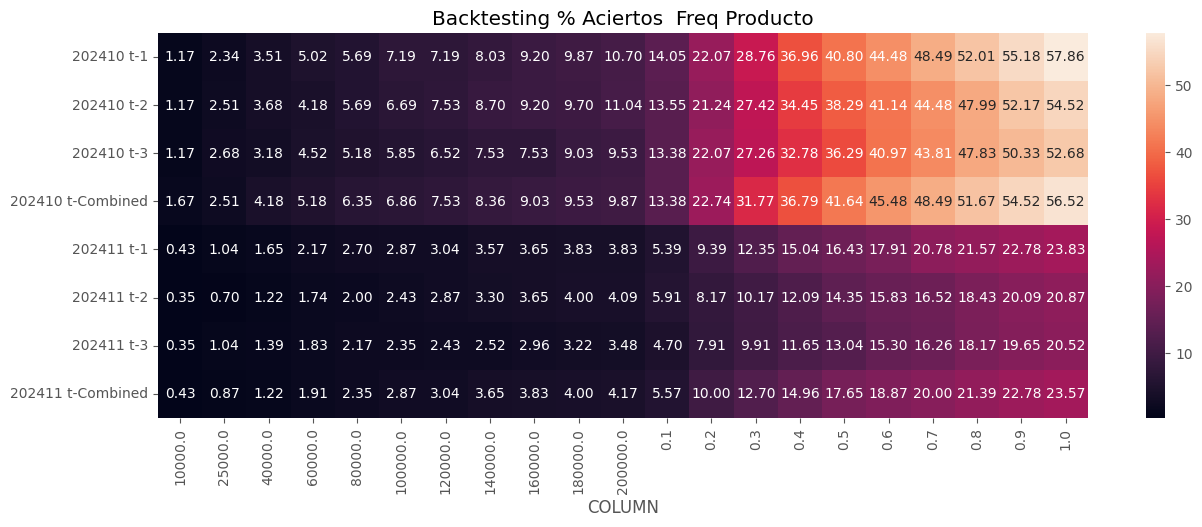

In [23]:
nametag_model = ['202410','202411']
backtesting_all = [data_backtesting1,data_backtesting2]
consolidacion_tipo = {}
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        df_i = save_backtesting[i]['contactabilidad_curva']#.keys()
        df_i = df_i[~df_i['Aciertos'].isnull()]
        df_i = df_i.replace('Fabrica '+params['target'].split('_')[0],name)
        df_i = df_i[df_i['Modelo'] == name]
        for tipo in df_i['Tipo'].unique():
            df_ii = df_i[df_i['Tipo'] == tipo]
            df_ii = df_ii.set_index('COLUMN')
            if tipo not in consolidacion_tipo:
                consolidacion_tipo[tipo] = {'Aciertos': pd.DataFrame(),'% Aciertos x Cliente':pd.DataFrame(),'% Aciertos': pd.DataFrame()}
            for col in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
                consolidacion_tipo[tipo][col] = pd.concat([consolidacion_tipo[tipo][col],df_ii[[col]].rename(columns = {col:name})], axis = 1)
print(consolidacion_tipo.keys())
import seaborn as sns
for col in list(consolidacion_tipo.keys()):
    for tipo in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
        if tipo == 'Aciertos':
            graph = consolidacion_tipo[col][tipo].T/1000
            msj = f'Backtesting {tipo} en Miles {col}'
        else:
            graph = consolidacion_tipo[col][tipo].T
            msj = f'Backtesting {tipo}  {col}'
        plt.figure(figsize=(15,5))
        sns.heatmap(graph, annot = True, fmt= '0.02f')
        plt.title(msj)
        plt.show()

In [19]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['ks']
        display(res)

202410 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.35      0.38          308346               80            0.03   
1      9      0.34      0.35          308346               47            0.02   
2      8      0.33      0.34          308346               39            0.01   
3      7      0.32      0.33          308346               48            0.02   
4      6      0.29      0.32          308346               23            0.01   
5      5      0.26      0.29          308346               22            0.01   
6      4      0.23      0.26          308346               22            0.01   
7      3      0.17      0.23          308346               21            0.01   
8      2      0.12      0.17          308346               16            0.01   
9      1      0.00      0.12          308346               16            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          23.95                10.0    13.95  
1          38.02                20.0    18.02  
2          49.70                30.0    19.70  
3          64.07                40.0    24.07  
4          70.96                50.0    20.96  
5          77.54                60.0    17.54  
6          84.13                70.0    14.13  
7          90.42                80.0    10.42  
8          95.21                90.0     5.21  
9         100.00               100.0     0.00

202410 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.35      0.38          309230               78            0.03   
1      9      0.34      0.35          309229               44            0.01   
2      8      0.33      0.34          309082               37            0.01   
3      7      0.32      0.33          309377               40            0.01   
4      6      0.29      0.32          309229               23            0.01   
5      5      0.26      0.29          309230               17            0.01   
6      4      0.23      0.26          309216               20            0.01   
7      3      0.17      0.23          309243               20            0.01   
8      2      0.12      0.17          309229               22            0.01   
9      1      0.00      0.12          309230               14            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          24.76                10.0    14.76  
1          38.73                20.0    18.73  
2          50.48                30.0    20.48  
3          63.17                40.0    23.17  
4          70.48                50.0    20.48  
5          75.87                60.0    15.87  
6          82.22                70.0    12.22  
7          88.57                80.0     8.57  
8          95.56                90.0     5.56  
9         100.00               100.0     0.00

202410 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.35      0.38          309354               77            0.02   
1      9      0.34      0.35          309354               49            0.02   
2      8      0.33      0.34          309354               29            0.01   
3      7      0.32      0.33          309354               33            0.01   
4      6      0.29      0.32          309353               21            0.01   
5      5      0.26      0.29          309354               27            0.01   
6      4      0.22      0.26          309354               17            0.01   
7      3      0.17      0.22          309354               24            0.01   
8      2      0.11      0.17          309354               13            0.00   
9      1      0.00      0.11          309354               14            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          25.33                10.0    15.33  
1          41.45                20.0    21.45  
2          50.99                30.0    20.99  
3          61.84                40.0    21.84  
4          68.75                50.0    18.75  
5          77.63                60.0    17.63  
6          83.22                70.0    13.22  
7          91.12                80.0    11.12  
8          95.39                90.0     5.39  
9         100.00               100.0     0.00

202410 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.36      0.38          308346               78            0.03   
1      9      0.35      0.36          308345               52            0.02   
2      8      0.34      0.35          308345               51            0.02   
3      7      0.34      0.34          308346               30            0.01   
4      6      0.32      0.34          308345               26            0.01   
5      5      0.31      0.32          308345               25            0.01   
6      4      0.28      0.31          308346               18            0.01   
7      3      0.24      0.28          308345               19            0.01   
8      2      0.17      0.24          308345               17            0.01   
9      1      0.10      0.17          308346               10            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          23.93                10.0    13.93  
1          39.88                20.0    19.88  
2          55.52                30.0    25.52  
3          64.72                40.0    24.72  
4          72.70                50.0    22.70  
5          80.37                60.0    20.37  
6          85.89                70.0    15.89  
7          91.72                80.0    11.72  
8          96.93                90.0     6.93  
9         100.00               100.0     0.00

202411 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.36      0.38          308088               62            0.02   
1      9      0.35      0.36          308088               34            0.01   
2      8      0.34      0.35          308088               32            0.01   
3      7      0.33      0.34          308088               28            0.01   
4      6      0.32      0.33          308087               16            0.01   
5      5      0.30      0.32          308088               17            0.01   
6      4      0.27      0.30          308088               30            0.01   
7      3      0.23      0.27          308088                9            0.00   
8      2      0.15      0.23          308049               14            0.00   
9      1      0.01      0.15          308127               12            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          24.41                10.0    14.41  
1          37.80                20.0    17.80  
2          50.39                30.0    20.39  
3          61.42                40.0    21.42  
4          67.72                50.0    17.72  
5          74.41                60.0    14.41  
6          86.22                70.0    16.22  
7          89.76                80.0     9.76  
8          95.28                90.0     5.28  
9         100.00               100.0     0.00

202411 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.35      0.38          308346               67            0.02   
1      9      0.34      0.35          308346               25            0.01   
2      8      0.33      0.34          308346               23            0.01   
3      7      0.32      0.33          308346               21            0.01   
4      6      0.29      0.32          308346               25            0.01   
5      5      0.26      0.29          308346               16            0.01   
6      4      0.23      0.26          308346                8            0.00   
7      3      0.17      0.23          308346               20            0.01   
8      2      0.12      0.17          308346               17            0.01   
9      1      0.00      0.12          308346                8            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          29.13                10.0    19.13  
1          40.00                20.0    20.00  
2          50.00                30.0    20.00  
3          59.13                40.0    19.13  
4          70.00                50.0    20.00  
5          76.96                60.0    16.96  
6          80.43                70.0    10.43  
7          89.13                80.0     9.13  
8          96.52                90.0     6.52  
9         100.00               100.0     0.00

202411 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.35      0.38          309230               54            0.02   
1      9      0.34      0.35          309229               35            0.01   
2      8      0.33      0.34          309082               22            0.01   
3      7      0.32      0.33          309377               20            0.01   
4      6      0.29      0.32          309229               16            0.01   
5      5      0.26      0.29          309230               24            0.01   
6      4      0.23      0.26          309216               11            0.00   
7      3      0.17      0.23          309243               21            0.01   
8      2      0.12      0.17          309229               15            0.00   
9      1      0.00      0.12          309230                8            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          23.89                10.0    13.89  
1          39.38                20.0    19.38  
2          49.12                30.0    19.12  
3          57.96                40.0    17.96  
4          65.04                50.0    15.04  
5          75.66                60.0    15.66  
6          80.53                70.0    10.53  
7          89.82                80.0     9.82  
8          96.46                90.0     6.46  
9         100.00               100.0     0.00

202411 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.36      0.38          308088               64            0.02   
1      9      0.36      0.36          308088               40            0.01   
2      8      0.35      0.36          308088               28            0.01   
3      7      0.34      0.35          308088               25            0.01   
4      6      0.34      0.34          308088               29            0.01   
5      5      0.33      0.34          308088               12            0.00   
6      4      0.31      0.33          308088               12            0.00   
7      3      0.29      0.31          308088               15            0.00   
8      2      0.24      0.29          308088               17            0.01   
9      1      0.13      0.24          308088                9            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          25.50                10.0    15.50  
1          41.43                20.0    21.43  
2          52.59                30.0    22.59  
3          62.55                40.0    22.55  
4          74.10                50.0    24.10  
5          78.88                60.0    18.88  
6          83.67                70.0    13.67  
7          89.64                80.0     9.64  
8          96.41                90.0     6.41  
9         100.00               100.0     0.00

In [20]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['metrics']
        display(res[res["metric_name"].isin(['No medible 1 %','N_top','f1-score','backtest_metric_ntop'])].drop('timestamp', axis=1))

202410 t-1


model_name model_type dataset_name           metric_name     metric_type  \
2          CC  Ensamble,       202409        No medible 1 %  overall metric   
5          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          CC  Ensamble,       202409                 N_top  overall metric   
10         CC  Ensamble,       202409              f1-score  overall metric   
20         CC  Ensamble,       202409              f1-score    class metric   
24         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
2     overall       2.3478  
5     overall       0.0179  
6     overall  925038.0000  
10    overall       0.0222  
20        0.0       0.0004  
24        1.0       0.0222

202410 t-2


model_name model_type dataset_name           metric_name     metric_type  \
2          CC  Ensamble,       202409        No medible 1 %  overall metric   
5          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          CC  Ensamble,       202409                 N_top  overall metric   
10         CC  Ensamble,       202409              f1-score  overall metric   
20         CC  Ensamble,       202409              f1-score    class metric   
24         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
2     overall       4.8707  
5     overall       0.0177  
6     overall  927688.0000  
10    overall       0.0214  
20        0.0       0.0005  
24        1.0       0.0214

202410 t-3


model_name model_type dataset_name           metric_name     metric_type  \
2          CC  Ensamble,       202409        No medible 1 %  overall metric   
5          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          CC  Ensamble,       202409                 N_top  overall metric   
10         CC  Ensamble,       202409              f1-score  overall metric   
20         CC  Ensamble,       202409              f1-score    class metric   
24         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
2     overall       7.7105  
5     overall       0.0168  
6     overall  928061.0000  
10    overall       0.0213  
20        0.0       0.0004  
24        1.0       0.0213

202410 t-Combined


model_name model_type dataset_name           metric_name     metric_type  \
1          CC  Ensamble,       202409        No medible 1 %  overall metric   
3          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
4          CC  Ensamble,       202409                 N_top  overall metric   
8          CC  Ensamble,       202409              f1-score  overall metric   
18         CC  Ensamble,       202409              f1-score    class metric   
22         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
1     overall       6.3375  
3     overall       0.0196  
4     overall  925036.0000  
8     overall       0.0226  
18        0.0       0.0000  
22        1.0       0.0226

202411 t-1


model_name model_type dataset_name           metric_name     metric_type  \
1          CC  Ensamble,       202409        No medible 1 %  overall metric   
3          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
4          CC  Ensamble,       202409                 N_top  overall metric   
8          CC  Ensamble,       202409              f1-score  overall metric   
18         CC  Ensamble,       202409              f1-score    class metric   
22         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
1     overall       2.5467  
3     overall       0.0142  
4     overall  924263.0000  
8     overall       0.0169  
18        0.0       0.0000  
22        1.0       0.0169

202411 t-2


model_name model_type dataset_name           metric_name     metric_type  \
2          CC  Ensamble,       202409        No medible 1 %  overall metric   
5          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          CC  Ensamble,       202409                 N_top  overall metric   
10         CC  Ensamble,       202409              f1-score  overall metric   
20         CC  Ensamble,       202409              f1-score    class metric   
24         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
2     overall       4.7932  
5     overall       0.0125  
6     overall  925038.0000  
10    overall       0.0157  
20        0.0       0.0004  
24        1.0       0.0157

202411 t-3


model_name model_type dataset_name           metric_name     metric_type  \
2          CC  Ensamble,       202409        No medible 1 %  overall metric   
5          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
6          CC  Ensamble,       202409                 N_top  overall metric   
10         CC  Ensamble,       202409              f1-score  overall metric   
20         CC  Ensamble,       202409              f1-score    class metric   
24         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
2     overall       7.2170  
5     overall       0.0125  
6     overall  927688.0000  
10    overall       0.0158  
20        0.0       0.0004  
24        1.0       0.0158

202411 t-Combined


model_name model_type dataset_name           metric_name     metric_type  \
1          CC  Ensamble,       202409        No medible 1 %  overall metric   
3          CC  Ensamble,       202409  backtest_metric_ntop  overall metric   
4          CC  Ensamble,       202409                 N_top  overall metric   
8          CC  Ensamble,       202409              f1-score  overall metric   
18         CC  Ensamble,       202409              f1-score    class metric   
22         CC  Ensamble,       202409              f1-score    class metric   

   class_name        value  
1     overall       5.4775  
3     overall       0.0147  
4     overall  924264.0000  
8     overall       0.0172  
18        0.0       0.0000  
22        1.0       0.0172

In [21]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['metrics']
        display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])

202410 t-1


timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-19 19:52         CC  Ensamble,       202409   True positives   
12  2024-12-19 19:52         CC  Ensamble,       202409  False negatives   
13  2024-12-19 19:52         CC  Ensamble,       202409   True negatives   
14  2024-12-19 19:52         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall      334.0  
12  overall metric    overall        0.0  
13  overall metric    overall        6.0  
14  overall metric    overall  3010726.0

202410 t-2


timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-19 19:53         CC  Ensamble,       202409   True positives   
12  2024-12-19 19:53         CC  Ensamble,       202409  False negatives   
13  2024-12-19 19:53         CC  Ensamble,       202409   True negatives   
14  2024-12-19 19:53         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall      315.0  
12  overall metric    overall        0.0  
13  overall metric    overall        7.0  
14  overall metric    overall  2941357.0

202410 t-3


timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-19 19:53         CC  Ensamble,       202409   True positives   
12  2024-12-19 19:53         CC  Ensamble,       202409  False negatives   
13  2024-12-19 19:53         CC  Ensamble,       202409   True negatives   
14  2024-12-19 19:53         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall      304.0  
12  overall metric    overall        0.0  
13  overall metric    overall        6.0  
14  overall metric    overall  2854698.0

202410 t-Combined


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-19 19:53         CC  Ensamble,       202409   True positives   
10  2024-12-19 19:53         CC  Ensamble,       202409  False negatives   
11  2024-12-19 19:53         CC  Ensamble,       202409   True negatives   
12  2024-12-19 19:53         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
9   overall metric    overall      326.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2887714.0

202411 t-1


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-19 21:46         CC  Ensamble,       202409   True positives   
10  2024-12-19 21:46         CC  Ensamble,       202409  False negatives   
11  2024-12-19 21:46         CC  Ensamble,       202409   True negatives   
12  2024-12-19 21:46         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
9   overall metric    overall      254.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  3002163.0

202411 t-2


timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-19 21:47         CC  Ensamble,       202409   True positives   
12  2024-12-19 21:47         CC  Ensamble,       202409  False negatives   
13  2024-12-19 21:47         CC  Ensamble,       202409   True negatives   
14  2024-12-19 21:47         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall      230.0  
12  overall metric    overall        0.0  
13  overall metric    overall        6.0  
14  overall metric    overall  2935427.0

202411 t-3


timestamp model_name model_type dataset_name      metric_name  \
11  2024-12-19 21:47         CC  Ensamble,       202409   True positives   
12  2024-12-19 21:47         CC  Ensamble,       202409  False negatives   
13  2024-12-19 21:47         CC  Ensamble,       202409   True negatives   
14  2024-12-19 21:47         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
11  overall metric    overall      226.0  
12  overall metric    overall        0.0  
13  overall metric    overall        6.0  
14  overall metric    overall  2868890.0

202411 t-Combined


timestamp model_name model_type dataset_name      metric_name  \
9   2024-12-19 21:47         CC  Ensamble,       202409   True positives   
10  2024-12-19 21:47         CC  Ensamble,       202409  False negatives   
11  2024-12-19 21:47         CC  Ensamble,       202409   True negatives   
12  2024-12-19 21:47         CC  Ensamble,       202409  False positives   

       metric_type class_name      value  
9   overall metric    overall      251.0  
10  overall metric    overall        0.0  
11  overall metric    overall        0.0  
12  overall metric    overall  2911873.0

### Modelo 360

In [11]:
import seaborn as sns

dict_keys([1, 2, 3, 'Combined'])
dict_keys([1, 2, 3, 'Combined'])


<Axes: ylabel='N'>

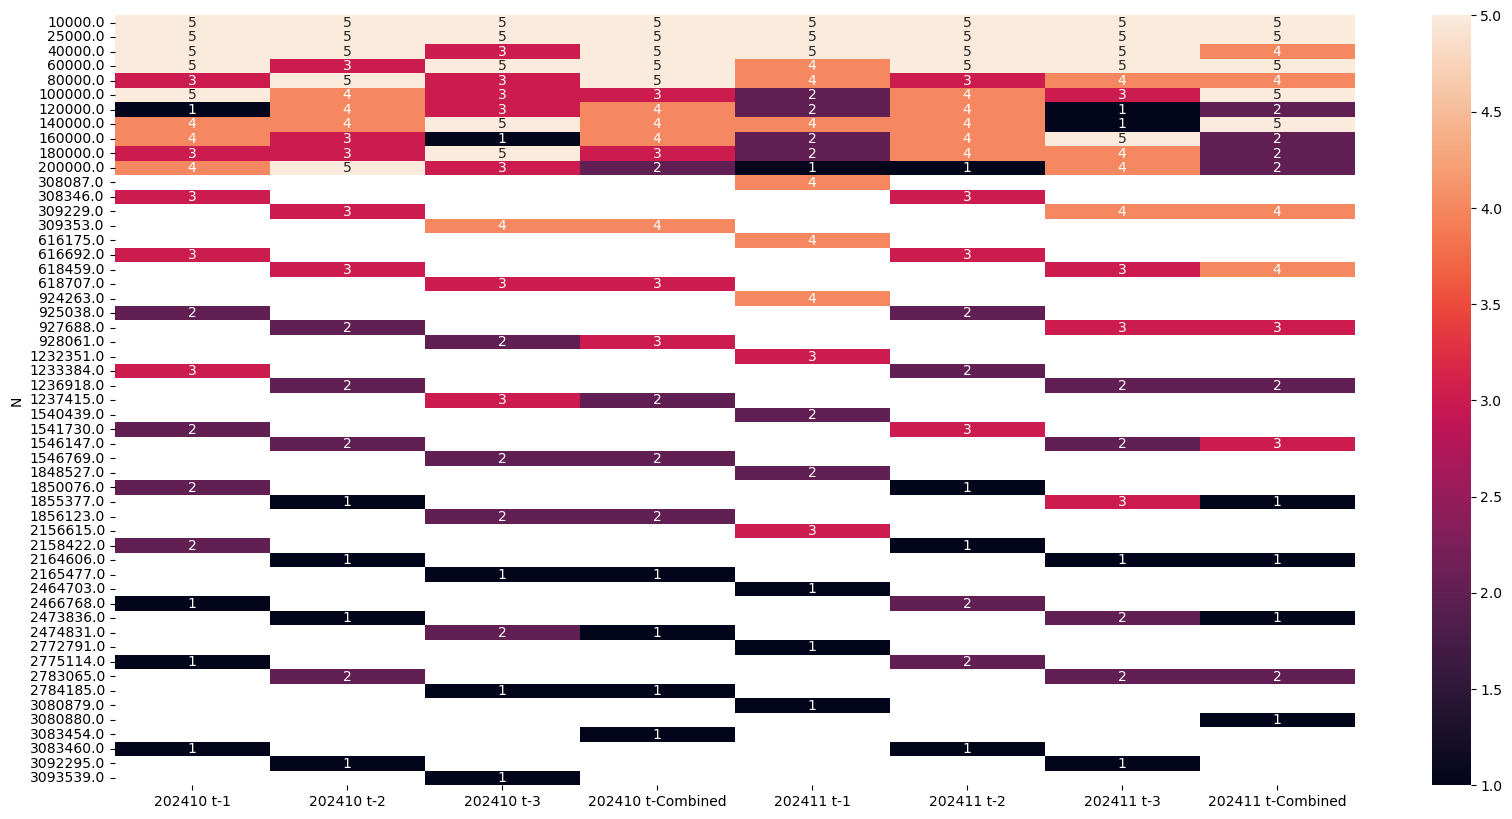

In [12]:
corte_modelo_360 = pd.DataFrame()
for ttt,save_backtesting in enumerate(backtesting_all):
    print(save_backtesting.keys())
    for t in  save_backtesting.keys():
        name = nametag_model[ttt]+' t-'+str(t)
        #if t == 1:
        df_tempo = save_backtesting[t]['modelo_360']
        df_tempo = df_tempo[['N','Aceleracion']].set_index('N').sort_index()
        df_tempo = df_tempo.rename(columns={'Aceleracion':name})
        corte_modelo_360 = pd.concat([corte_modelo_360,df_tempo],axis = 1)
corte_modelo_360 = corte_modelo_360.sort_index()
plt.figure(figsize=(20,10))
sns.heatmap(corte_modelo_360, annot = True, fmt = '0.1g')

In [15]:
ttt = 1
obs_order = 924263.0
nametag_model[ttt]

'202411'

In [17]:
df_tempo = backtesting_all[ttt][1]['modelo_360']
df_tempo

N  Aciertos      pend  Aceleracion
0     10000.0       5.0       NaN          5.0
1     25000.0      12.0  0.000467          5.0
2     40000.0      19.0  0.000467          5.0
3     60000.0      25.0  0.000300          4.0
4     80000.0      31.0  0.000300          4.0
5    100000.0      33.0  0.000100          2.0
6    120000.0      35.0  0.000100          2.0
7    140000.0      41.0  0.000300          4.0
8    160000.0      42.0  0.000050          2.0
9    180000.0      44.0  0.000100          2.0
10   200000.0      44.0  0.000000          1.0
11   308087.0      62.0  0.000167          4.0
12   616175.0     108.0  0.000149          4.0
13   924263.0     142.0  0.000110          4.0
14  1232351.0     173.0  0.000101          3.0
15  1540439.0     189.0  0.000052          2.0
16  1848527.0     206.0  0.000055          2.0
17  2156615.0     239.0  0.000107          3.0
18  2464703.0     248.0  0.000029          1.0
19  2772791.0     262.0  0.000045          1.0
20  3080879.0     274.0  0.000039          1.0

In [19]:
df_tempo = backtesting_all[ttt][1]['modelo_360']
if np.isnan(df_tempo.loc[0,'pend']) == True:
    df_tempo.loc[0,'pend'] = df_tempo.loc[0,'Aciertos'] /df_tempo.loc[0,'N']
df_temp = df_tempo[df_tempo['N']<=obs_order]
df_temp['Aceleracion'] = backtesting.deciles_func(df_temp['pend'], 5)
df_temp1 = df_tempo[df_tempo['N']>obs_order]
df_temp1.loc[df_temp1.index,'Aceleracion'] = 1
df_temp = pd.concat([df_temp,df_temp1], axis = 0)
df_temp

[12/20/24 15:45:30] INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=655163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=492406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 5                                                     ]8;id=625737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=943550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    WARNING  /tmp/ipykernel_1398/1675877078.py:5: SettingWithCopyWarning:           ]8;id=763928;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=426584;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df_temp['Aceleracion'] = backtesting.deciles_func(df_temp['pend'],                  
                             5)                                                                                    
                                                                                                                   

N  Aciertos      pend  Aceleracion
0     10000.0       5.0  0.000500          5.0
1     25000.0      12.0  0.000467          5.0
2     40000.0      19.0  0.000467          5.0
3     60000.0      25.0  0.000300          4.0
4     80000.0      31.0  0.000300          4.0
5    100000.0      33.0  0.000100          1.0
6    120000.0      35.0  0.000100          1.0
7    140000.0      41.0  0.000300          4.0
8    160000.0      42.0  0.000050          1.0
9    180000.0      44.0  0.000100          1.0
10   200000.0      44.0  0.000000          1.0
11   308087.0      62.0  0.000167          3.0
12   616175.0     108.0  0.000149          3.0
13   924263.0     142.0  0.000110          2.0
14  1232351.0     173.0  0.000101          1.0
15  1540439.0     189.0  0.000052          1.0
16  1848527.0     206.0  0.000055          1.0
17  2156615.0     239.0  0.000107          1.0
18  2464703.0     248.0  0.000029          1.0
19  2772791.0     262.0  0.000045          1.0
20  3080879.0     274.0  0.000039          1.0

In [23]:
df_temp.to_parquet('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/CC/09-backtesting/curva_efec.parquet')

In [24]:
pd.read_parquet('s3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/CC/09-backtesting/curva_efec.parquet')

N  Aciertos      pend  Aceleracion
0     10000.0       5.0  0.000500          5.0
1     25000.0      12.0  0.000467          5.0
2     40000.0      19.0  0.000467          5.0
3     60000.0      25.0  0.000300          4.0
4     80000.0      31.0  0.000300          4.0
5    100000.0      33.0  0.000100          1.0
6    120000.0      35.0  0.000100          1.0
7    140000.0      41.0  0.000300          4.0
8    160000.0      42.0  0.000050          1.0
9    180000.0      44.0  0.000100          1.0
10   200000.0      44.0  0.000000          1.0
11   308087.0      62.0  0.000167          3.0
12   616175.0     108.0  0.000149          3.0
13   924263.0     142.0  0.000110          2.0
14  1232351.0     173.0  0.000101          1.0
15  1540439.0     189.0  0.000052          1.0
16  1848527.0     206.0  0.000055          1.0
17  2156615.0     239.0  0.000107          1.0
18  2464703.0     248.0  0.000029          1.0
19  2772791.0     262.0  0.000045          1.0
20  3080879.0     274.0  0.000039          1.0